In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.9
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.9_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9.csv", delimiter=" ")

print(menor.shape)

(2555, 4)


In [2]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array

def get_errors(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9):
    
    mae=[np.sum(np.abs(e0),axis=0)[2]/e0.shape[0],np.sum(np.abs(e1),axis=0)[2]/e1.shape[0],np.sum(np.abs(e2),axis=0)[2]/e2.shape[0],
       np.sum(np.abs(e3),axis=0)[2]/e3.shape[0],np.sum(np.abs(e4),axis=0)[2]/e4.shape[0],np.sum(np.abs(e5),axis=0)[2]/e5.shape[0],
       np.sum(np.abs(e6),axis=0)[2]/e6.shape[0],np.sum(np.abs(e7,),axis=0)[2]/e7.shape[0],np.sum(np.abs(e8),axis=0)[2]/e8.shape[0],
       np.sum(np.abs(e9),axis=0)[2]/e9.shape[0]]
    
    mse=[np.sum(e0**2,axis=0)[2]/e0.shape[0],np.sum(e1**2,axis=0)[2]/e1.shape[0],np.sum(e2**2,axis=0)[2]/e2.shape[0],
       np.sum(e3**2,axis=0)[2]/e3.shape[0],np.sum(e4**2,axis=0)[2]/e4.shape[0],np.sum(e5**2,axis=0)[2]/e5.shape[0],
       np.sum(e6**2,axis=0)[2]/e6.shape[0],np.sum(e7**2,axis=0)[2]/e7.shape[0],np.sum(e8**2,axis=0)[2]/e8.shape[0],
       np.sum(e9**2,axis=0)[2]/e9.shape[0]]

    rmse=[np.sqrt(np.sum(e0**2,axis=0)[2]/e0.shape[0]),np.sqrt(np.sum(e1**2,axis=0)[2]/e1.shape[0]),np.sqrt(np.sum(e2**2,axis=0)[2]/e2.shape[0]),
       np.sqrt(np.sum(e3**2,axis=0)[2]/e3.shape[0]),np.sqrt(np.sum(e4**2,axis=0)[2]/e4.shape[0]),np.sqrt(np.sum(e5**2,axis=0)[2]/e5.shape[0]),
       np.sqrt(np.sum(e6**2,axis=0)[2]/e6.shape[0]),np.sqrt(np.sum(e7**2,axis=0)[2]/e7.shape[0]),np.sqrt(np.sum(e8**2,axis=0)[2]/e8.shape[0]),
       np.sqrt(np.sum(e9**2,axis=0)[2]/e9.shape[0])]
    
    return mae,mse,rmse
    

In [3]:
erro_bl0 = []
erro_bl1 = []
erro_bl2 = []
erro_bl3 = []
erro_bl4 = []
erro_bl5 = []
erro_bl6 = []
erro_bl7 = []
erro_bl8 = []
erro_bl9 = []

erro2d_bl0 = []
erro2d_bl1 = []
erro2d_bl2 = []
erro2d_bl3 = []
erro2d_bl4 = []
erro2d_bl5 = []
erro2d_bl6 = []
erro2d_bl7 = []
erro2d_bl8 = []
erro2d_bl9 = []

erro3d_bl0 = []
erro3d_bl1 = []
erro3d_bl2 = []
erro3d_bl3 = []
erro3d_bl4 = []
erro3d_bl5 = []
erro3d_bl6 = []
erro3d_bl7 = []
erro3d_bl8 = []
erro3d_bl9 = []

erro4d_bl0 = []
erro4d_bl1 = []
erro4d_bl2 = []
erro4d_bl3 = []
erro4d_bl4 = []
erro4d_bl5 = []
erro4d_bl6 = []
erro4d_bl7 = []
erro4d_bl8 = []
erro4d_bl9 = []

MAE = []
MSE = []
RMSE = []
MAE2D = []
MSE2D = []
RMSE2D = []
MAE3D = []
MSE3D = []
RMSE3D = []
MAE4D = []
MSE4D = []
RMSE4D = []


for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    
    
    cont = np.zeros((10))
    for ii in range(future):
        
        if data[trainlen+ii] < 0.1:
            erro_bl0.append(prediction[ii][0])
            erro_bl0.append(data[trainlen+ii])
            erro_bl0.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl0.append(i)
            erro_bl0.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl0.append(prediction[ii][0])
                erro2d_bl0.append(data[trainlen+ii])
                erro2d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl0.append(i)
                erro2d_bl0.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl0.append(prediction[ii][0])
                erro3d_bl0.append(data[trainlen+ii])
                erro3d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl0.append(i)
                erro3d_bl0.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl0.append(prediction[ii][0])
                erro4d_bl0.append(data[trainlen+ii])
                erro4d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl0.append(i)
                erro4d_bl0.append(ii)
            cont[0]+=1
        elif data[trainlen+ii] < 0.2:
            erro_bl1.append(prediction[ii][0])
            erro_bl1.append(data[trainlen+ii])
            erro_bl1.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl1.append(i)
            erro_bl1.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl1.append(prediction[ii][0])
                erro2d_bl1.append(data[trainlen+ii])
                erro2d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl1.append(i)
                erro2d_bl1.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl1.append(prediction[ii][0])
                erro3d_bl1.append(data[trainlen+ii])
                erro3d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl1.append(i)
                erro3d_bl1.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl1.append(prediction[ii][0])
                erro4d_bl1.append(data[trainlen+ii])
                erro4d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl1.append(i)
                erro4d_bl1.append(ii)
            cont[1]+=1
        elif data[trainlen+ii] < 0.3:
            erro_bl2.append(prediction[ii][0])
            erro_bl2.append(data[trainlen+ii])
            erro_bl2.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl2.append(i)
            erro_bl2.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl2.append(prediction[ii][0])
                erro2d_bl2.append(data[trainlen+ii])
                erro2d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl2.append(i)
                erro2d_bl2.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl2.append(prediction[ii][0])
                erro3d_bl2.append(data[trainlen+ii])
                erro3d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl2.append(i)
                erro3d_bl2.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl2.append(prediction[ii][0])
                erro4d_bl2.append(data[trainlen+ii])
                erro4d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl2.append(i)
                erro4d_bl2.append(ii)
            cont[2]+=1
        elif data[trainlen+ii] < 0.4:
            erro_bl3.append(prediction[ii][0])
            erro_bl3.append(data[trainlen+ii])
            erro_bl3.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl3.append(i)
            erro_bl3.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl3.append(prediction[ii][0])
                erro2d_bl3.append(data[trainlen+ii])
                erro2d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl3.append(i)
                erro2d_bl3.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl3.append(prediction[ii][0])
                erro3d_bl3.append(data[trainlen+ii])
                erro3d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl3.append(i)
                erro3d_bl3.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl3.append(prediction[ii][0])
                erro4d_bl3.append(data[trainlen+ii])
                erro4d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl3.append(i)
                erro4d_bl3.append(ii)
            cont[3]+=1
        elif data[trainlen+ii] < 0.5:
            erro_bl4.append(prediction[ii][0])
            erro_bl4.append(data[trainlen+ii])
            erro_bl4.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl4.append(i)
            erro_bl4.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl4.append(prediction[ii][0])
                erro2d_bl4.append(data[trainlen+ii])
                erro2d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl4.append(i)
                erro2d_bl4.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl4.append(prediction[ii][0])
                erro3d_bl4.append(data[trainlen+ii])
                erro3d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl4.append(i)
                erro3d_bl4.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl4.append(prediction[ii][0])
                erro4d_bl4.append(data[trainlen+ii])
                erro4d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl4.append(i)
                erro4d_bl4.append(ii)
            cont[4]+=1
        elif data[trainlen+ii] < 0.6:
            erro_bl5.append(prediction[ii][0])
            erro_bl5.append(data[trainlen+ii])
            erro_bl5.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl5.append(i)
            erro_bl5.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl5.append(prediction[ii][0])
                erro2d_bl5.append(data[trainlen+ii])
                erro2d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl5.append(i)
                erro2d_bl5.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl5.append(prediction[ii][0])
                erro3d_bl5.append(data[trainlen+ii])
                erro3d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl5.append(i)
                erro3d_bl5.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl5.append(prediction[ii][0])
                erro4d_bl5.append(data[trainlen+ii])
                erro4d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl5.append(i)
                erro4d_bl5.append(ii)
            cont[5]+=1
        elif data[trainlen+ii] < 0.7:
            erro_bl6.append(prediction[ii][0])
            erro_bl6.append(data[trainlen+ii])
            erro_bl6.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl6.append(i)
            erro_bl6.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl6.append(prediction[ii][0])
                erro2d_bl6.append(data[trainlen+ii])
                erro2d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl6.append(i)
                erro2d_bl6.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl6.append(prediction[ii][0])
                erro3d_bl6.append(data[trainlen+ii])
                erro3d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl6.append(i)
                erro3d_bl6.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl6.append(prediction[ii][0])
                erro4d_bl6.append(data[trainlen+ii])
                erro4d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl6.append(i)
                erro4d_bl6.append(ii)
            cont[6]+=1
        elif data[trainlen+ii] < 0.8:
            erro_bl7.append(prediction[ii][0])
            erro_bl7.append(data[trainlen+ii])
            erro_bl7.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl7.append(i)
            erro_bl7.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl7.append(prediction[ii][0])
                erro2d_bl7.append(data[trainlen+ii])
                erro2d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl7.append(i)
                erro2d_bl7.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl7.append(prediction[ii][0])
                erro3d_bl7.append(data[trainlen+ii])
                erro3d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl7.append(i)
                erro3d_bl7.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl7.append(prediction[ii][0])
                erro4d_bl7.append(data[trainlen+ii])
                erro4d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl7.append(i)
                erro4d_bl7.append(ii)
            cont[7]+=1
        elif data[trainlen+ii] < 0.9:
            erro_bl8.append(prediction[ii][0])
            erro_bl8.append(data[trainlen+ii])
            erro_bl8.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl8.append(i)
            erro_bl8.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl8.append(prediction[ii][0])
                erro2d_bl8.append(data[trainlen+ii])
                erro2d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl8.append(i)
                erro2d_bl8.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl8.append(prediction[ii][0])
                erro3d_bl8.append(data[trainlen+ii])
                erro3d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl8.append(i)
                erro3d_bl8.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl8.append(prediction[ii][0])
                erro4d_bl8.append(data[trainlen+ii])
                erro4d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl8.append(i)
                erro4d_bl8.append(ii)
            cont[8]+=1
        else:
            erro_bl9.append(prediction[ii][0])
            erro_bl9.append(data[trainlen+ii])
            erro_bl9.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl9.append(i)
            erro_bl9.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl9.append(prediction[ii][0])
                erro2d_bl9.append(data[trainlen+ii])
                erro2d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl9.append(i)
                erro2d_bl9.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl9.append(prediction[ii][0])
                erro3d_bl9.append(data[trainlen+ii])
                erro3d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl9.append(i)
                erro3d_bl9.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl9.append(prediction[ii][0])
                erro4d_bl9.append(data[trainlen+ii])
                erro4d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl9.append(i)
                erro4d_bl9.append(ii)
            cont[9]+=1
    
    mae,mse,rmse = get_errors(get_array(erro_bl0),get_array(erro_bl1),get_array(erro_bl2),get_array(erro_bl3),get_array(erro_bl4),get_array(erro_bl5),get_array(erro_bl6),get_array(erro_bl7),get_array(erro_bl8),get_array(erro_bl9))
    mae2d,mse2d,rmse2d = get_errors(get_array(erro2d_bl0),get_array(erro2d_bl1),get_array(erro2d_bl2),get_array(erro2d_bl3),get_array(erro2d_bl4),get_array(erro2d_bl5),get_array(erro2d_bl6),get_array(erro2d_bl7),get_array(erro2d_bl8),get_array(erro2d_bl9)) 
    mae3d,mse3d,rmse3d = get_errors(get_array(erro3d_bl0),get_array(erro3d_bl1),get_array(erro3d_bl2),get_array(erro3d_bl3),get_array(erro3d_bl4),get_array(erro3d_bl5),get_array(erro3d_bl6),get_array(erro3d_bl7),get_array(erro3d_bl8),get_array(erro3d_bl9))  
    mae4d,mse4d,rmse4d = get_errors(get_array(erro4d_bl0),get_array(erro4d_bl1),get_array(erro4d_bl2),get_array(erro4d_bl3),get_array(erro4d_bl4),get_array(erro4d_bl5),get_array(erro4d_bl6),get_array(erro4d_bl7),get_array(erro4d_bl8),get_array(erro4d_bl9)) 
    
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE2D.append(mae2d)
    MSE2D.append(mse2d)
    RMSE2D.append(rmse2d)
    MAE3D.append(mae3d)
    MSE3D.append(mse3d)
    RMSE3D.append(rmse3d)
    MAE4D.append(mae4d)
    MSE4D.append(mse4d)
    RMSE4D.append(rmse4d)
        
    
    mae_cp,mse_cp,rmse_cp = mae,mse,rmse
    mae2d_cp,mse2d_cp,rmse2d_cp = mae2d,mse2d,rmse2d
    mae3d_cp,mse3d_cp,rmse3d_cp = mae3d,mse3d,rmse3d
    mae4d_cp,mse4d_cp,rmse4d_cp = mae4d,mse4d,rmse4d
    
    
    
    

0 test error: 0.0015742657968794498
1 test error: 0.00147901488954063


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.p

2 test error: 0.0016490633430340889
3 test error: 0.0010173050097524489
4 test error: 0.0022512568108611773
5 test error: 0.0012307561520468145
6 test error: 0.0009298836765204162
7 test error: 0.004958860977958415
8 test error: 0.0016793456681701722
9 test error: 0.0018651683143826262
10 test error: 0.0020720573742024173
11 test error: 0.0013716207539990755
12 test error: 0.0013406569508154233
13 test error: 0.0009489983796700102
14 test error: 0.002264377878687245
15 test error: 0.001979763066232218
16 test error: 0.0022437637822482737
17 test error: 0.0016905662891333962
18 test error: 0.0005289462721118787
19 test error: 0.0011069317826061088
20 test error: 0.0011351258747545985
21 test error: 0.001386982362890787
22 test error: 0.0011978329283526428
23 test error: 0.0018010576031560668
24 test error: 0.002345042319726428
25 test error: 0.0025427960089350597
26 test error: 0.0014044721769776438
27 test error: 0.001412918980984153
28 test error: 0.0006820746977995654
29 test error: 

223 test error: 0.0015935073808250855
224 test error: 0.000983334582990081
225 test error: 0.0019219544086255232
226 test error: 0.0020764104761090366
227 test error: 0.0008487593964049842
228 test error: 0.000419799836925404
229 test error: 0.00434764270889063
230 test error: 0.000997593059057499
231 test error: 0.0012934153450758683
232 test error: 0.0006823913996971451
233 test error: 0.0014377111061330814
234 test error: 0.0007439578917268103
235 test error: 0.0015991345547963008
236 test error: 0.0019478511793426284
237 test error: 0.0012532362932563587
238 test error: 0.0018725309005395137
239 test error: 0.0005294774212967123
240 test error: 0.0018617936391162613
241 test error: 0.0018497162409916745
242 test error: 0.0016112130971067
243 test error: 0.002944897530728041
244 test error: 0.0015639635325776292
245 test error: 0.0009427028852223173
246 test error: 0.0014822622795897962
247 test error: 0.0009211540203423621
248 test error: 0.0009888252356755223
249 test error: 0.000

443 test error: 0.001384799482534879
444 test error: 0.0007950341378369305
445 test error: 0.0012587773626292602
446 test error: 0.0038906418067660097
447 test error: 0.002711460101338805
448 test error: 0.0011435217612017854
449 test error: 0.002375707229972729
450 test error: 0.0010083050081969819
451 test error: 0.0010715166108683425
452 test error: 0.001039705441697419
453 test error: 0.0021690234048045267
454 test error: 0.0008403643654138247
455 test error: 0.00187854742034322
456 test error: 0.0019219134729571593
457 test error: 0.002159312471660013
458 test error: 0.0020690873789186584
459 test error: 0.0017093760021974437
460 test error: 0.0019251557725750929
461 test error: 0.0031279997124228245
462 test error: 0.0017023215255162732
463 test error: 0.001422057756093478
464 test error: 0.0028507122903158443
465 test error: 0.0018816715368206959
466 test error: 0.0013336172171381604
467 test error: 0.0010469495928213828
468 test error: 0.002466743522662988
469 test error: 0.001

664 test error: 0.0012049321509394397
665 test error: 0.0006898477398050849
666 test error: 0.0012488806644577616
667 test error: 0.0034043754843784495
668 test error: 0.0029168279755915597
669 test error: 0.0012725574600682041
670 test error: 0.0013941863905422166
671 test error: 0.002379818424833169
672 test error: 0.001411742153811859
673 test error: 0.0016715106122821342
674 test error: 0.0012438008361386503
675 test error: 0.001998840900289576
676 test error: 0.0023678021376878416
677 test error: 0.0007907153581338601
678 test error: 0.0013560891508951236
679 test error: 0.0015768970278236367
680 test error: 0.0008789149179064663
681 test error: 0.0015559430494533873
682 test error: 0.0014111459905110071
683 test error: 0.0013035523902950553
684 test error: 0.0015711654200238638
685 test error: 0.0008424462808033658
686 test error: 0.0013841563594554317
687 test error: 0.0013400126409058167
688 test error: 0.0033073899210334426
689 test error: 0.002490260585810772
690 test error: 

884 test error: 0.0007396799052011403
885 test error: 0.0010731864379617357
886 test error: 0.001692564226262045
887 test error: 0.0009912120982139097
888 test error: 0.0012379129018170955
889 test error: 0.003390047538714135
890 test error: 0.0008551169131340012
891 test error: 0.0016043020804162584
892 test error: 0.0010339803326058163
893 test error: 0.002046501581820043
894 test error: 0.0014750452970284426
895 test error: 0.00319027324020324
896 test error: 0.0015638190316623957
897 test error: 0.0016216025588834716
898 test error: 0.0007124411143994438
899 test error: 0.0008696906858116944
900 test error: 0.0023007326239656337
901 test error: 0.001622960377538571
902 test error: 0.0010851520122562006
903 test error: 0.0006347569975406756
904 test error: 0.0007308447396342701
905 test error: 0.002378060300658857
906 test error: 0.0019451585178745683
907 test error: 0.0007134349005347726
908 test error: 0.0016337227067289009
909 test error: 0.0009191308951402759
910 test error: 0.0

1101 test error: 0.0015622796465282213
1102 test error: 0.0019699932004186163
1103 test error: 0.0015751398452947044
1104 test error: 0.001280611567997199
1105 test error: 0.001245415167148479
1106 test error: 0.0011340825420090076
1107 test error: 0.001026169036952558
1108 test error: 0.001111286156958072
1109 test error: 0.001874425283756327
1110 test error: 0.0025505974184807496
1111 test error: 0.0018945553508406933
1112 test error: 0.001335115995665718
1113 test error: 0.001217772528990616
1114 test error: 0.0014132636574170632
1115 test error: 0.001022088719548823
1116 test error: 0.0012689006109392082
1117 test error: 0.0010464350932425307
1118 test error: 0.0010017477467826434
1119 test error: 0.00148107949860422
1120 test error: 0.0012134537343418692
1121 test error: 0.00161813754929254
1122 test error: 0.0013774025010156966
1123 test error: 0.002307432779183872
1124 test error: 0.0022663157198610155
1125 test error: 0.0013593275598451986
1126 test error: 0.0007974819491650168

1313 test error: 0.0009074584864721748
1314 test error: 0.001528370119814508
1315 test error: 0.001059722866908046
1316 test error: 0.0006555237144675329
1317 test error: 0.0019350790197877393
1318 test error: 0.0013184050313569588
1319 test error: 0.002672805414770374
1320 test error: 0.0006386052713365759
1321 test error: 0.0018801674564679618
1322 test error: 0.0015639260133458541
1323 test error: 0.0008479125024330696
1324 test error: 0.0020637298416726958
1325 test error: 0.00172360505587769
1326 test error: 0.0016340461583337989
1327 test error: 0.002265039999939185
1328 test error: 0.0010428585988544285
1329 test error: 0.0012047997777629004
1330 test error: 0.0015155611292885871
1331 test error: 0.0016506849491499669
1332 test error: 0.0016783686787488366
1333 test error: 0.0008303253963298393
1334 test error: 0.0012203675088981118
1335 test error: 0.0009906164259237992
1336 test error: 0.0010638323575970039
1337 test error: 0.0014362482398620666
1338 test error: 0.000645272299

1525 test error: 0.0014045294050168335
1526 test error: 0.0009959625417152902
1527 test error: 0.002158463955094091
1528 test error: 0.002447792706769122
1529 test error: 0.0013634033920591558
1530 test error: 0.0009424911074708978
1531 test error: 0.0015597124443660374
1532 test error: 0.002053196860823461
1533 test error: 0.0012152977891626976
1534 test error: 0.002456801176822738
1535 test error: 0.0024981409045201
1536 test error: 0.0015367589963937122
1537 test error: 0.0015429784059978007
1538 test error: 0.001280855206419352
1539 test error: 0.0020793498927042836
1540 test error: 0.000880912087980372
1541 test error: 0.0012904597901877111
1542 test error: 0.0025135380135191602
1543 test error: 0.001251913767469318
1544 test error: 0.0018548857175607772
1545 test error: 0.001401055850921653
1546 test error: 0.0013754377482084335
1547 test error: 0.0010130660618771201
1548 test error: 0.0012470996466842903
1549 test error: 0.001162773944981755
1550 test error: 0.000812490676607935

1739 test error: 0.0019082571240013927
1740 test error: 0.0009031989546153001
1741 test error: 0.001307608139213898
1742 test error: 0.0023075662437858214
1743 test error: 0.002126605976960299
1744 test error: 0.0017682211219391044
1745 test error: 0.0009180746147434786
1746 test error: 0.0019588212566967484
1747 test error: 0.0012097638191370136
1748 test error: 0.0007975940413906721
1749 test error: 0.0006064597709024246
1750 test error: 0.0009540533700118914
1751 test error: 0.002773131385514281
1752 test error: 0.001954364684220712
1753 test error: 0.0017881929279479345
1754 test error: 0.0015573731058207145
1755 test error: 0.0015349031591313925
1756 test error: 0.0008455949048543804
1757 test error: 0.0019882920035170838
1758 test error: 0.0014780655010996568
1759 test error: 0.002235696758068928
1760 test error: 0.0012272158689876022
1761 test error: 0.0023272914435431462
1762 test error: 0.0018127209057612
1763 test error: 0.0009682396791205992
1764 test error: 0.00165893154304

1953 test error: 0.0010260096492897732
1954 test error: 0.0006561791082054908
1955 test error: 0.0012609489312780976
1956 test error: 0.001300895178743763
1957 test error: 0.0014455663863735622
1958 test error: 0.0010253483458842155
1959 test error: 0.001573052661408321
1960 test error: 0.0012401061000471476
1961 test error: 0.0007256086140219327
1962 test error: 0.0010210027649869783
1963 test error: 0.0013055825019051054
1964 test error: 0.001100925320409154
1965 test error: 0.001504498022963186
1966 test error: 0.001348538039143103
1967 test error: 0.0020980554863667404
1968 test error: 0.0005842303833408873
1969 test error: 0.0021629978892403257
1970 test error: 0.0016270245846279113
1971 test error: 0.0009821768485277623
1972 test error: 0.0012332106389683869
1973 test error: 0.002553900549206206
1974 test error: 0.0031199662900281014
1975 test error: 0.001310008819120079
1976 test error: 0.002558036847937226
1977 test error: 0.0018126649248642547
1978 test error: 0.00108238785059

2166 test error: 0.0006227035466038605
2167 test error: 0.0011257174915632582
2168 test error: 0.000898959531907735
2169 test error: 0.0013630606316311575
2170 test error: 0.0006498008570902822
2171 test error: 0.0015164439449727217
2172 test error: 0.0007936125383265322
2173 test error: 0.009603976067611184
2174 test error: 0.0013485434244841952
2175 test error: 0.0033027898685164996
2176 test error: 0.0014995684004666693
2177 test error: 0.0015026321638463927
2178 test error: 0.0013458467749556183
2179 test error: 0.0014968376166694648
2180 test error: 0.0020571774479120827
2181 test error: 0.00080264447362046
2182 test error: 0.002373794721197022
2183 test error: 0.0010741947854397069
2184 test error: 0.0015248227482217718
2185 test error: 0.0012501512643435207
2186 test error: 0.001410165546607979
2187 test error: 0.0011815987547483893
2188 test error: 0.0030070385848182343
2189 test error: 0.0020758923908075736
2190 test error: 0.0011902572372191182
2191 test error: 0.001469134736

2378 test error: 0.0010299735802882072
2379 test error: 0.0014835780892402397
2380 test error: 0.0013869510471338166
2381 test error: 0.0006598733186322734
2382 test error: 0.0007299122589094271
2383 test error: 0.0016134332346426073
2384 test error: 0.0012231813287513426
2385 test error: 0.0009396698218927245
2386 test error: 0.0018024736077448798
2387 test error: 0.0008943781885943183
2388 test error: 0.0019068838854390945
2389 test error: 0.0007602234406486373
2390 test error: 0.002509926980071477
2391 test error: 0.001651640336649255
2392 test error: 0.002059364201985601
2393 test error: 0.001353298010680937
2394 test error: 0.0016334523743993484
2395 test error: 0.0010380879782734293
2396 test error: 0.0010326596658860015
2397 test error: 0.0009484329682398399
2398 test error: 0.0011043255111183197
2399 test error: 0.002225970928848282
2400 test error: 0.0014608961434692419
2401 test error: 0.001570465323135789
2402 test error: 0.0012904561565969571
2403 test error: 0.001106600709

In [4]:
MAEc = get_array2(MAE)
MSEc = get_array2(MSE)
RMSEc = get_array2(RMSE)
MAE2Dc = get_array2(MAE2D)
MSE2Dc = get_array2(MSE2D)
RMSE2Dc = get_array2(RMSE2D)
MAE3Dc = get_array2(MAE3D)
MSE3Dc = get_array2(MSE3D)
RMSE3Dc = get_array2(RMSE3D)
MAE4Dc = get_array2(MAE4D)
MSE4Dc = get_array2(MSE4D)
RMSE4Dc = get_array2(RMSE4D)

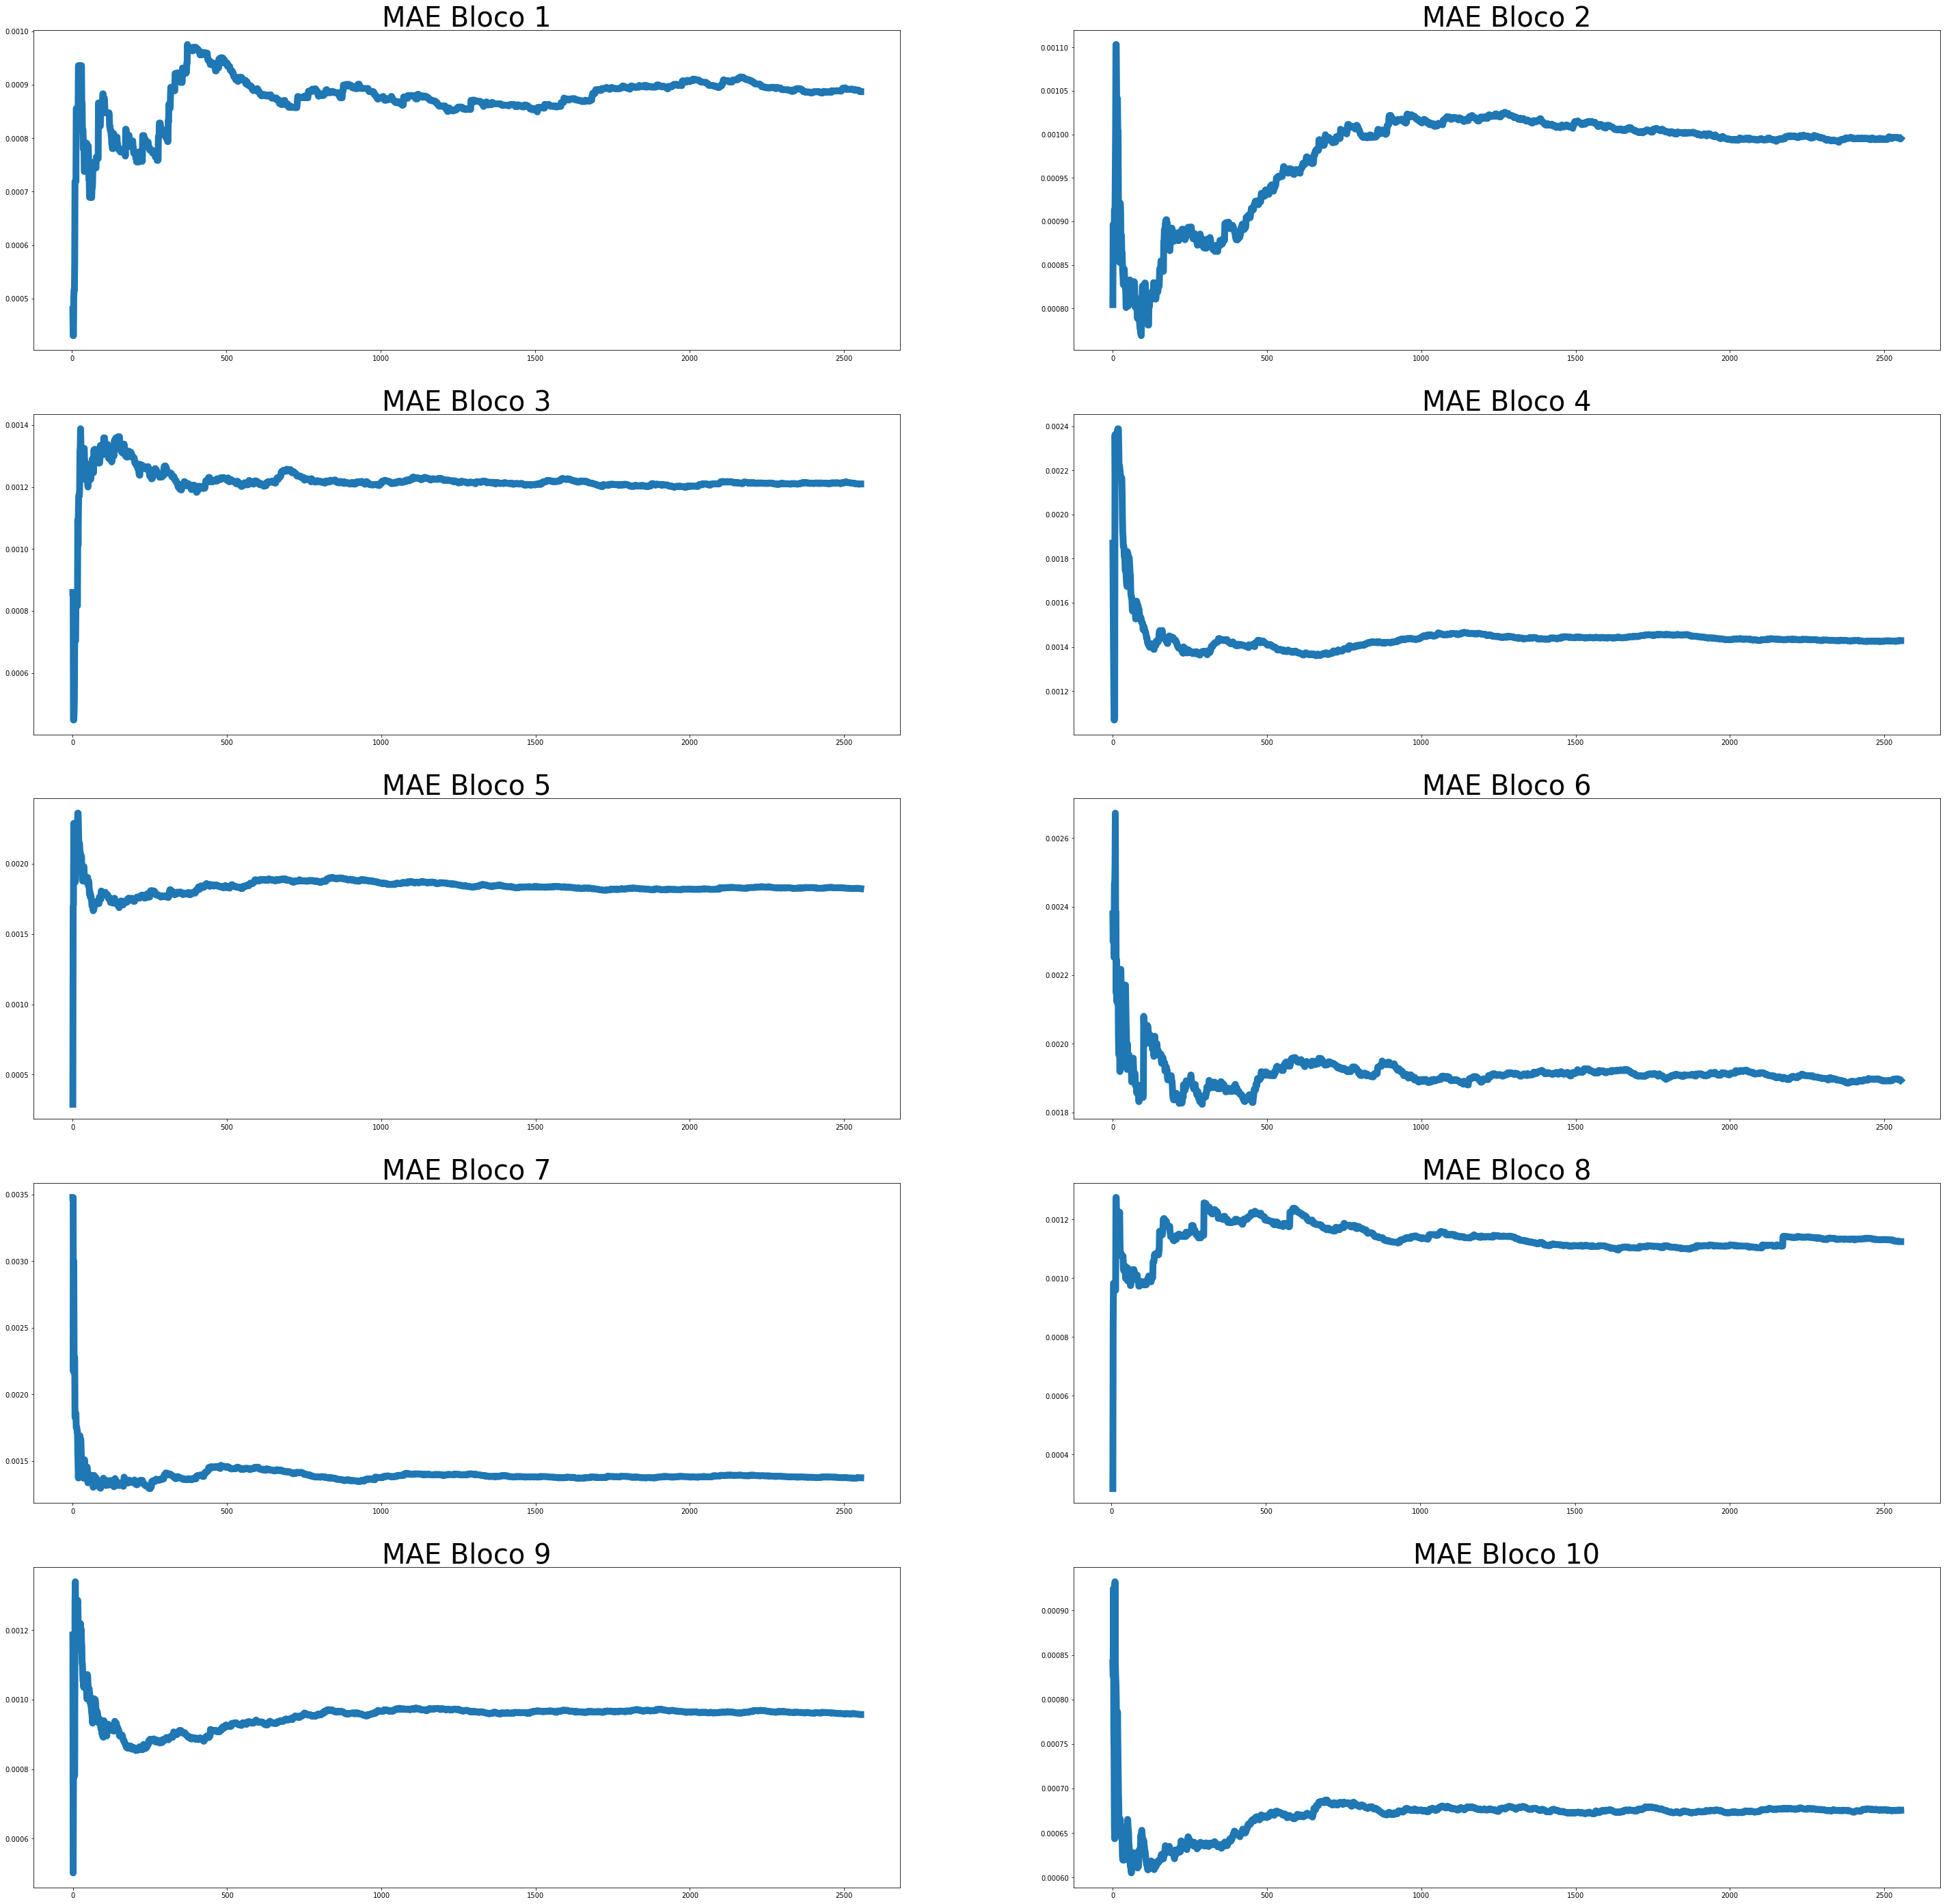

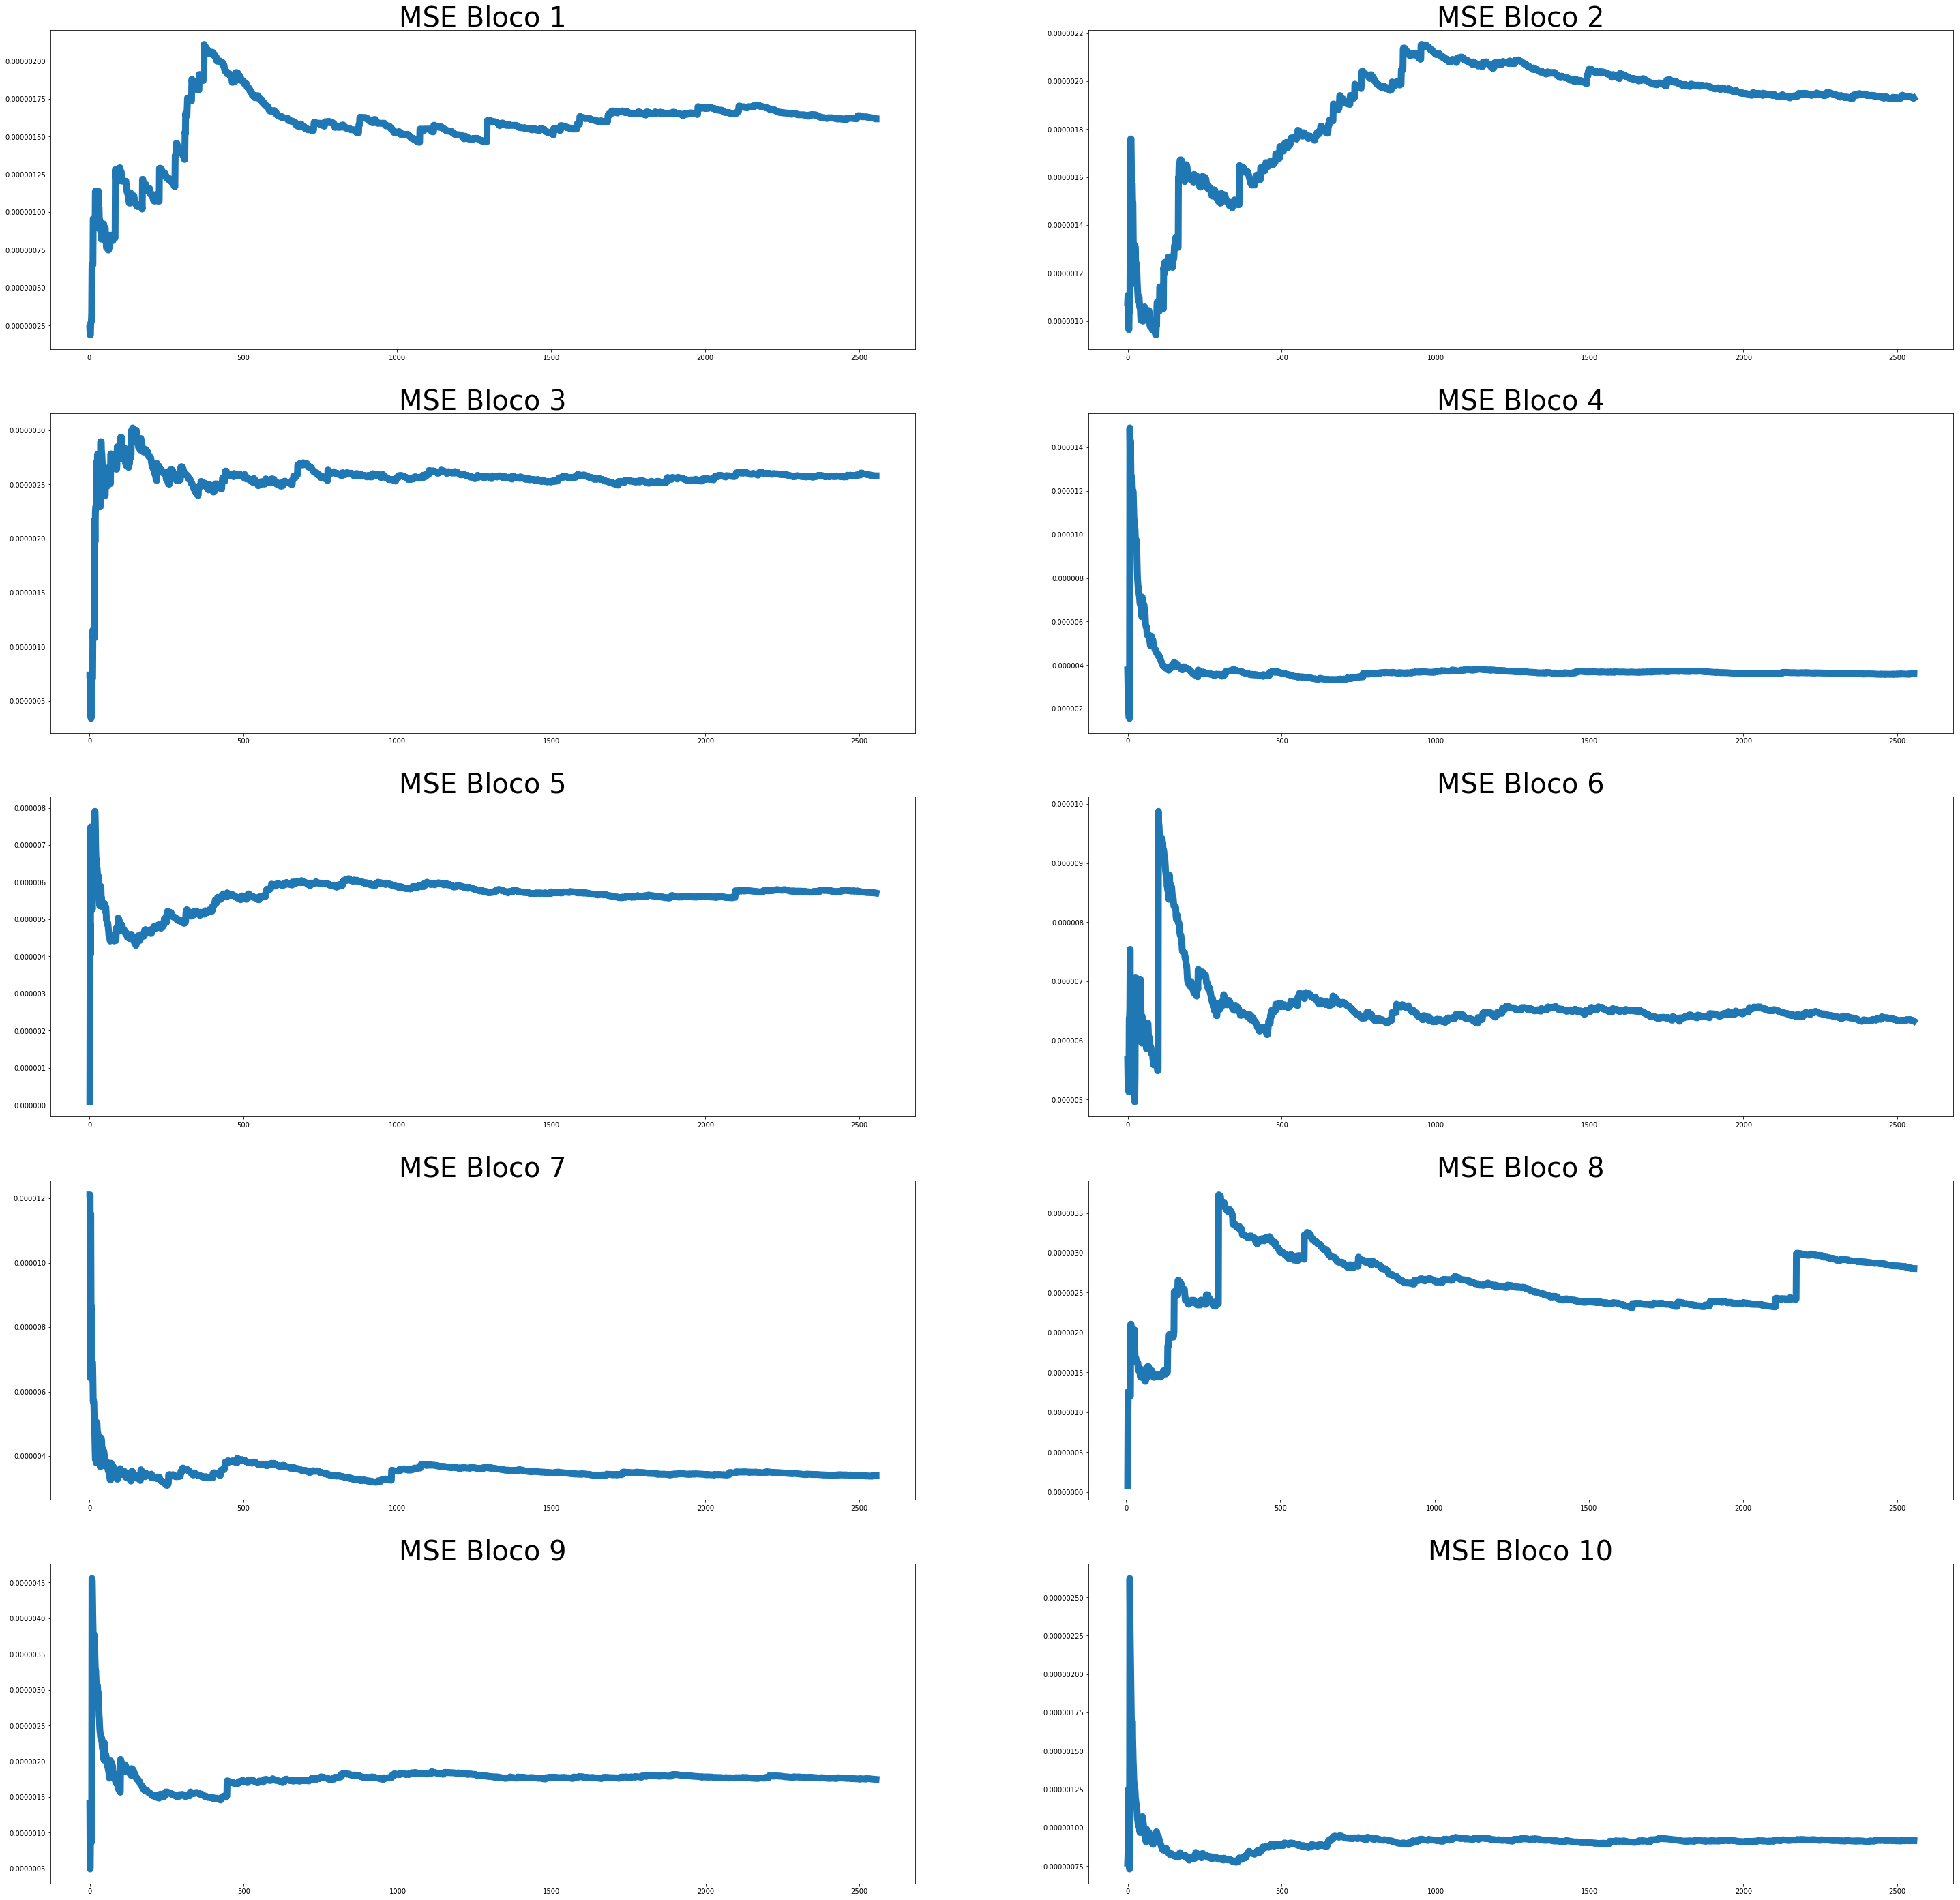

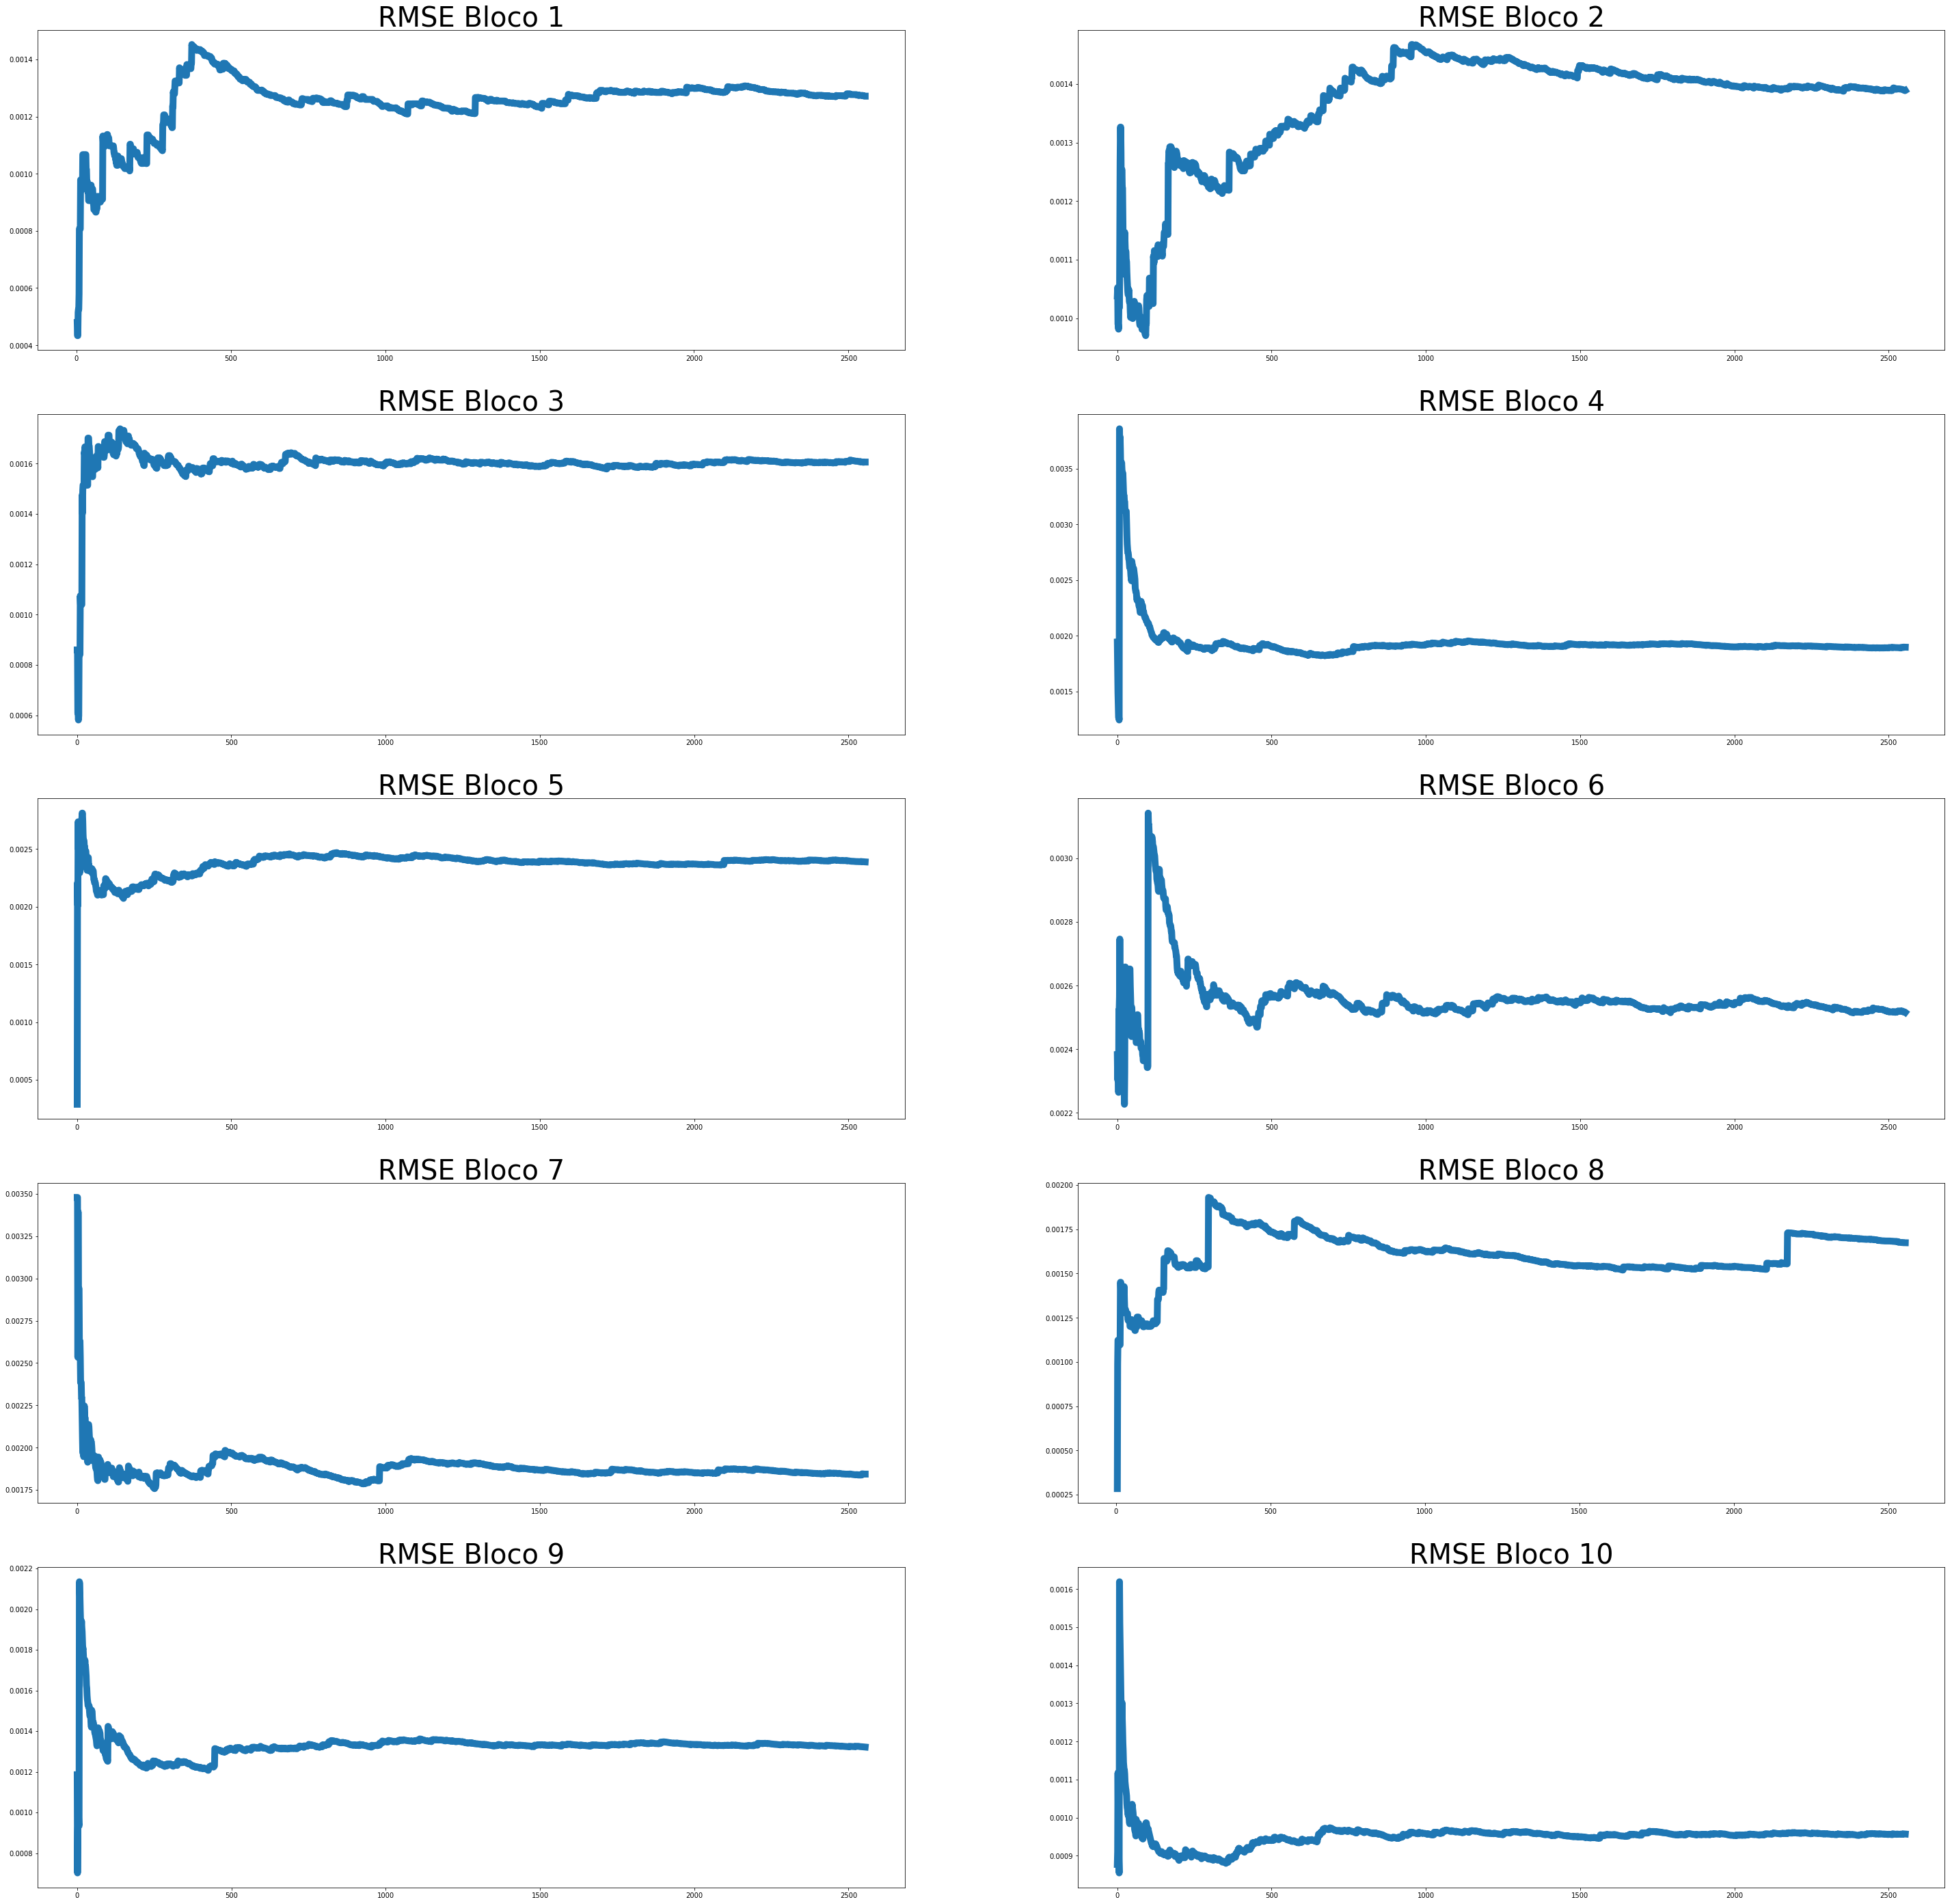

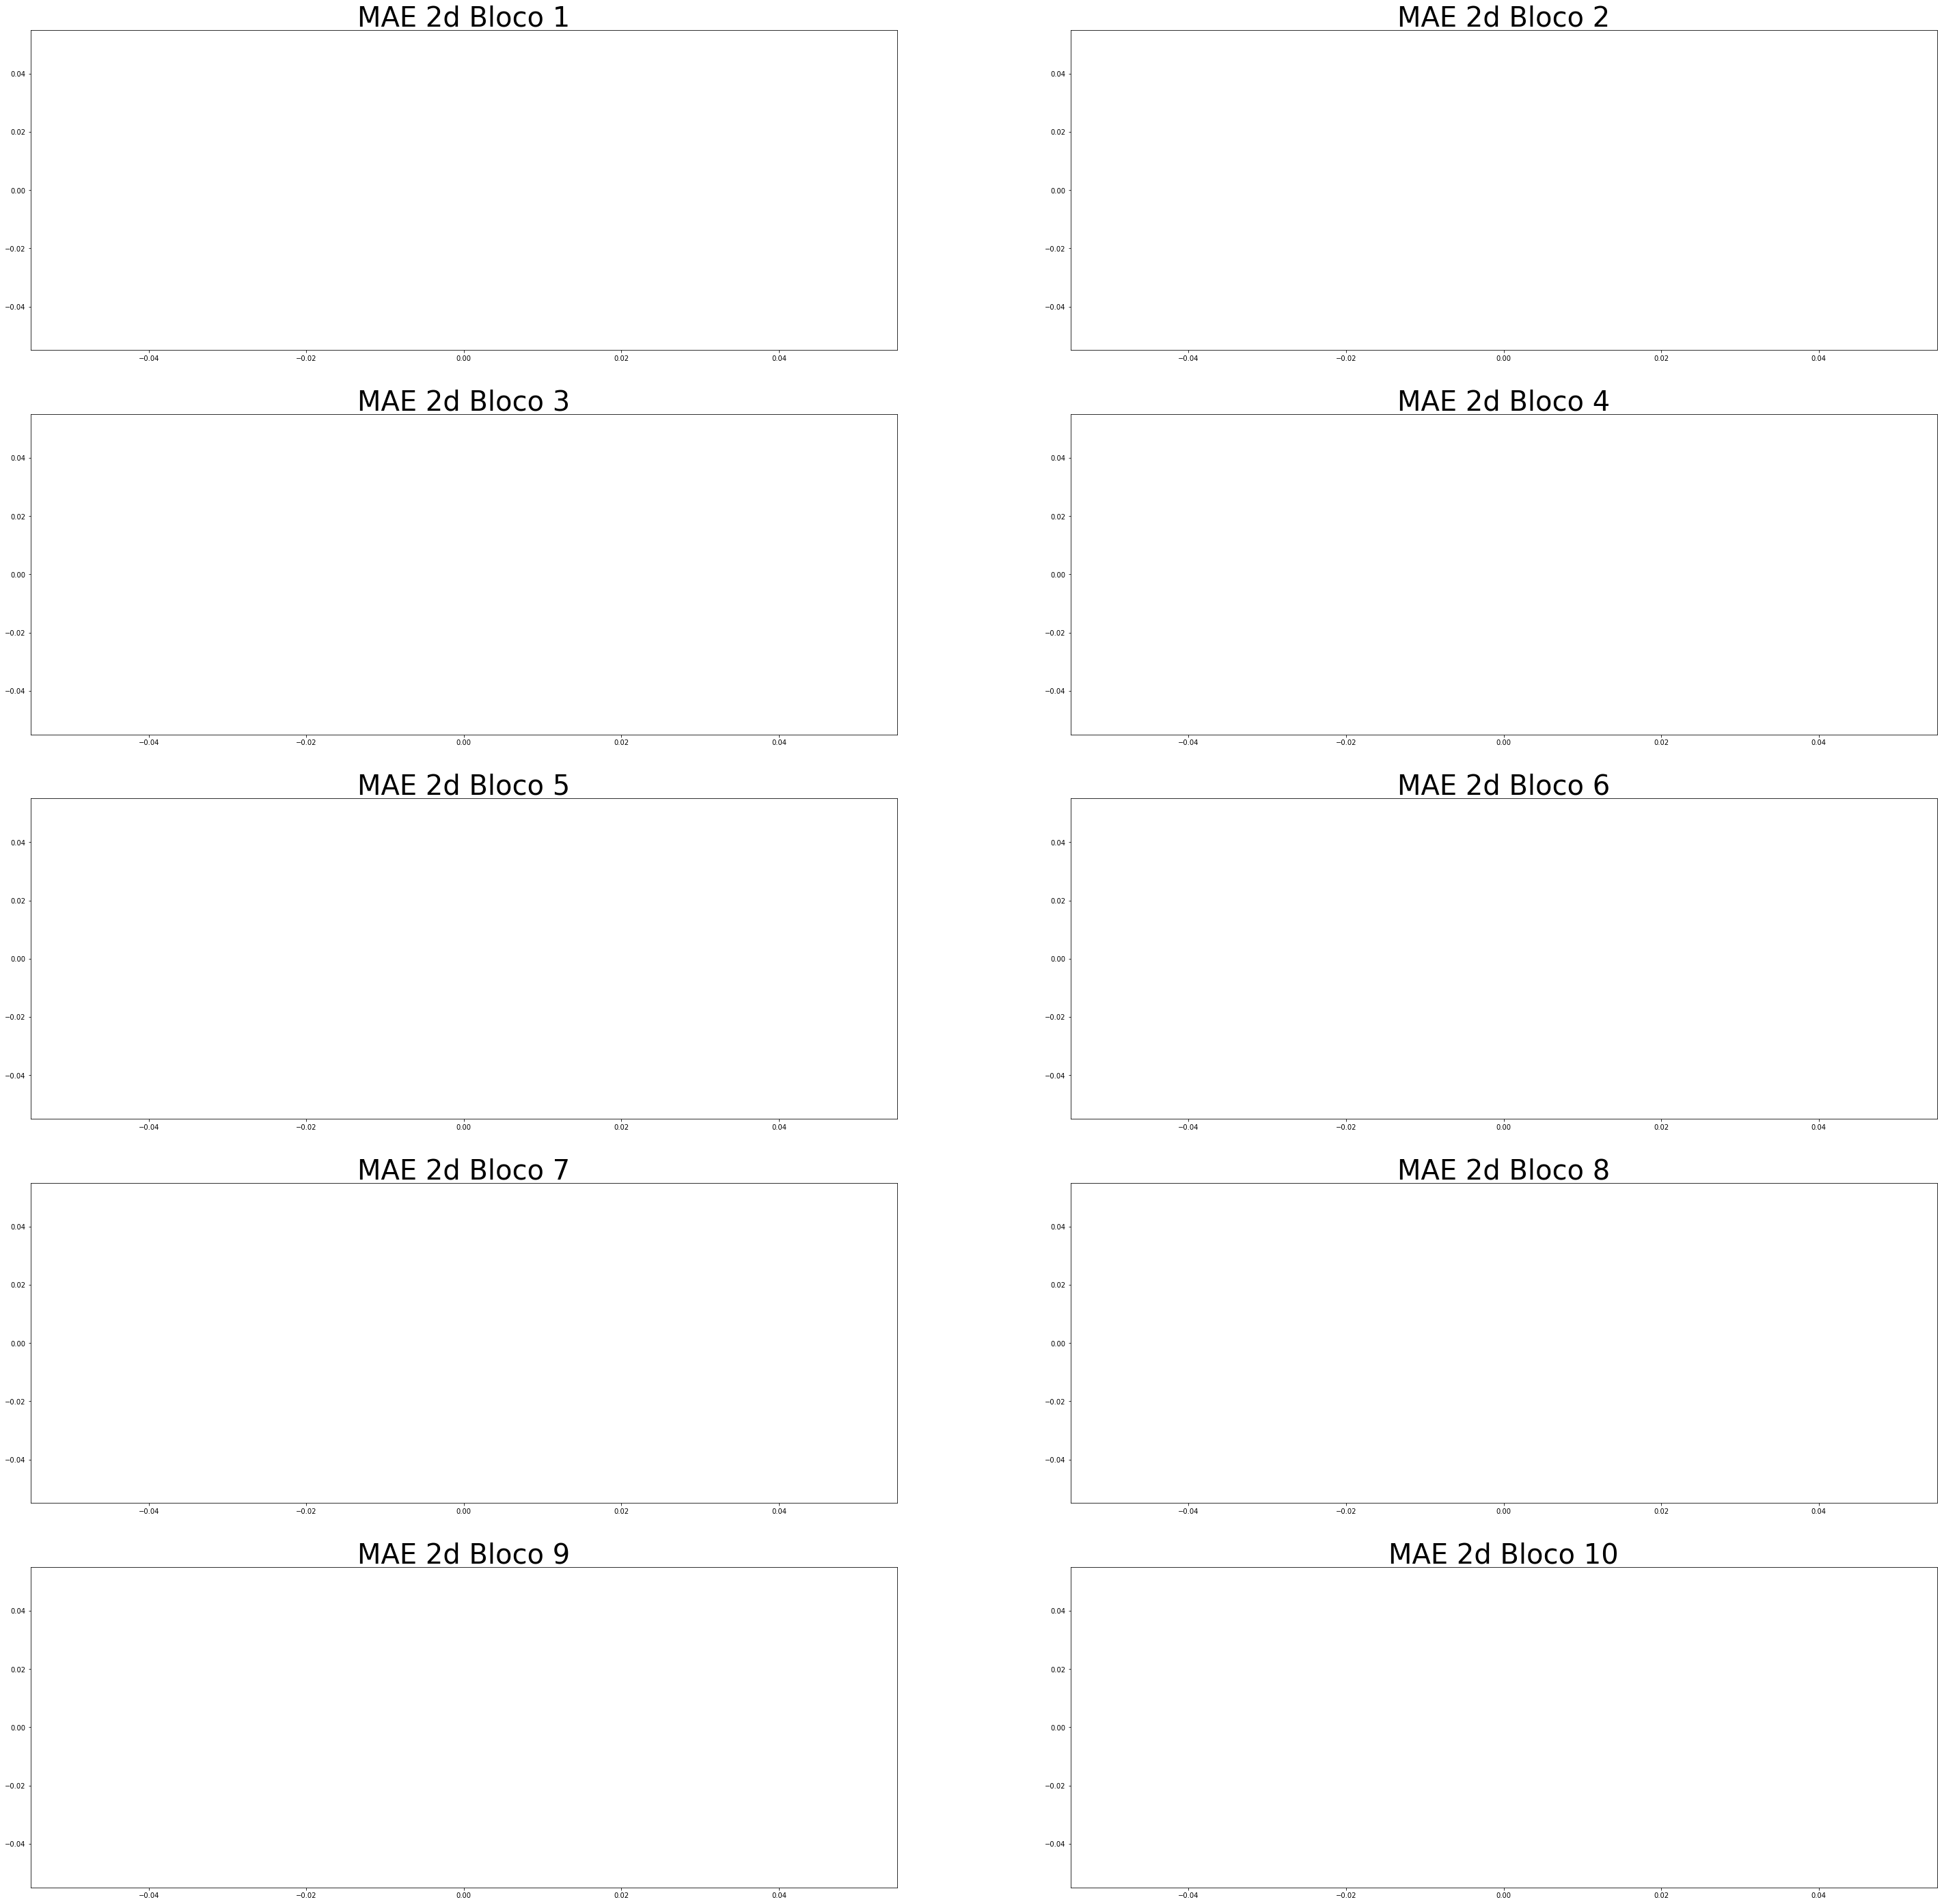

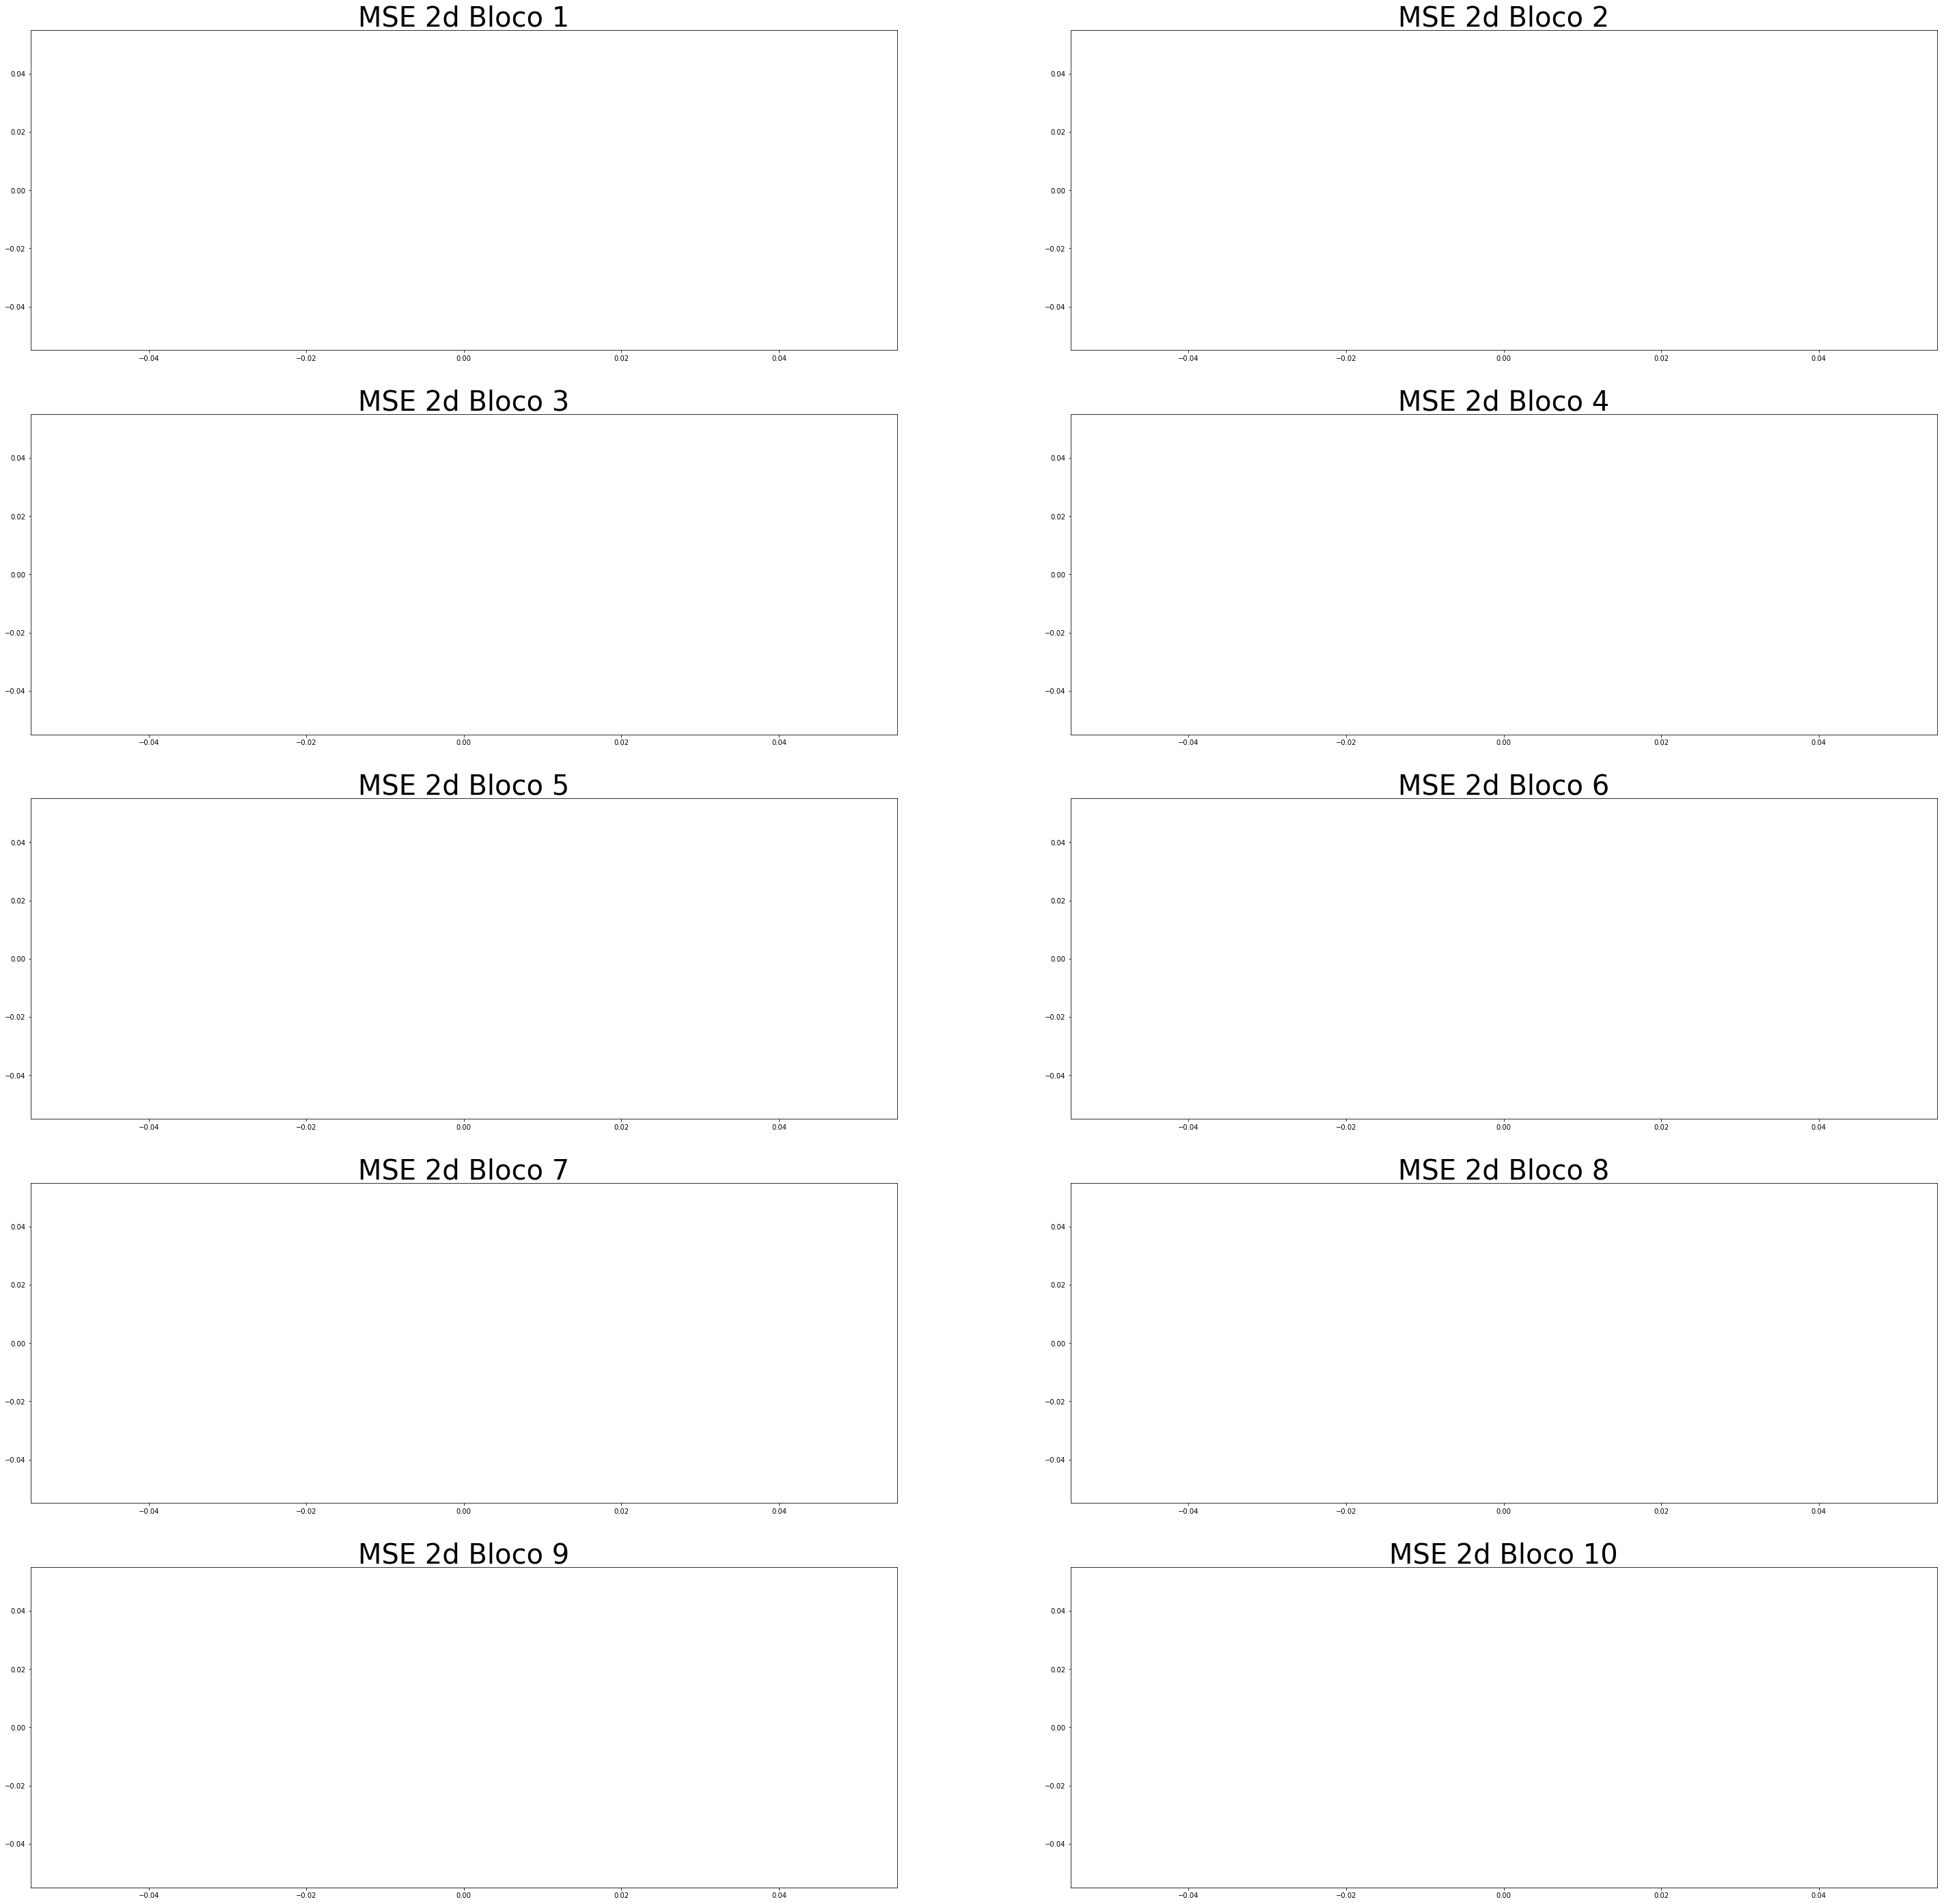

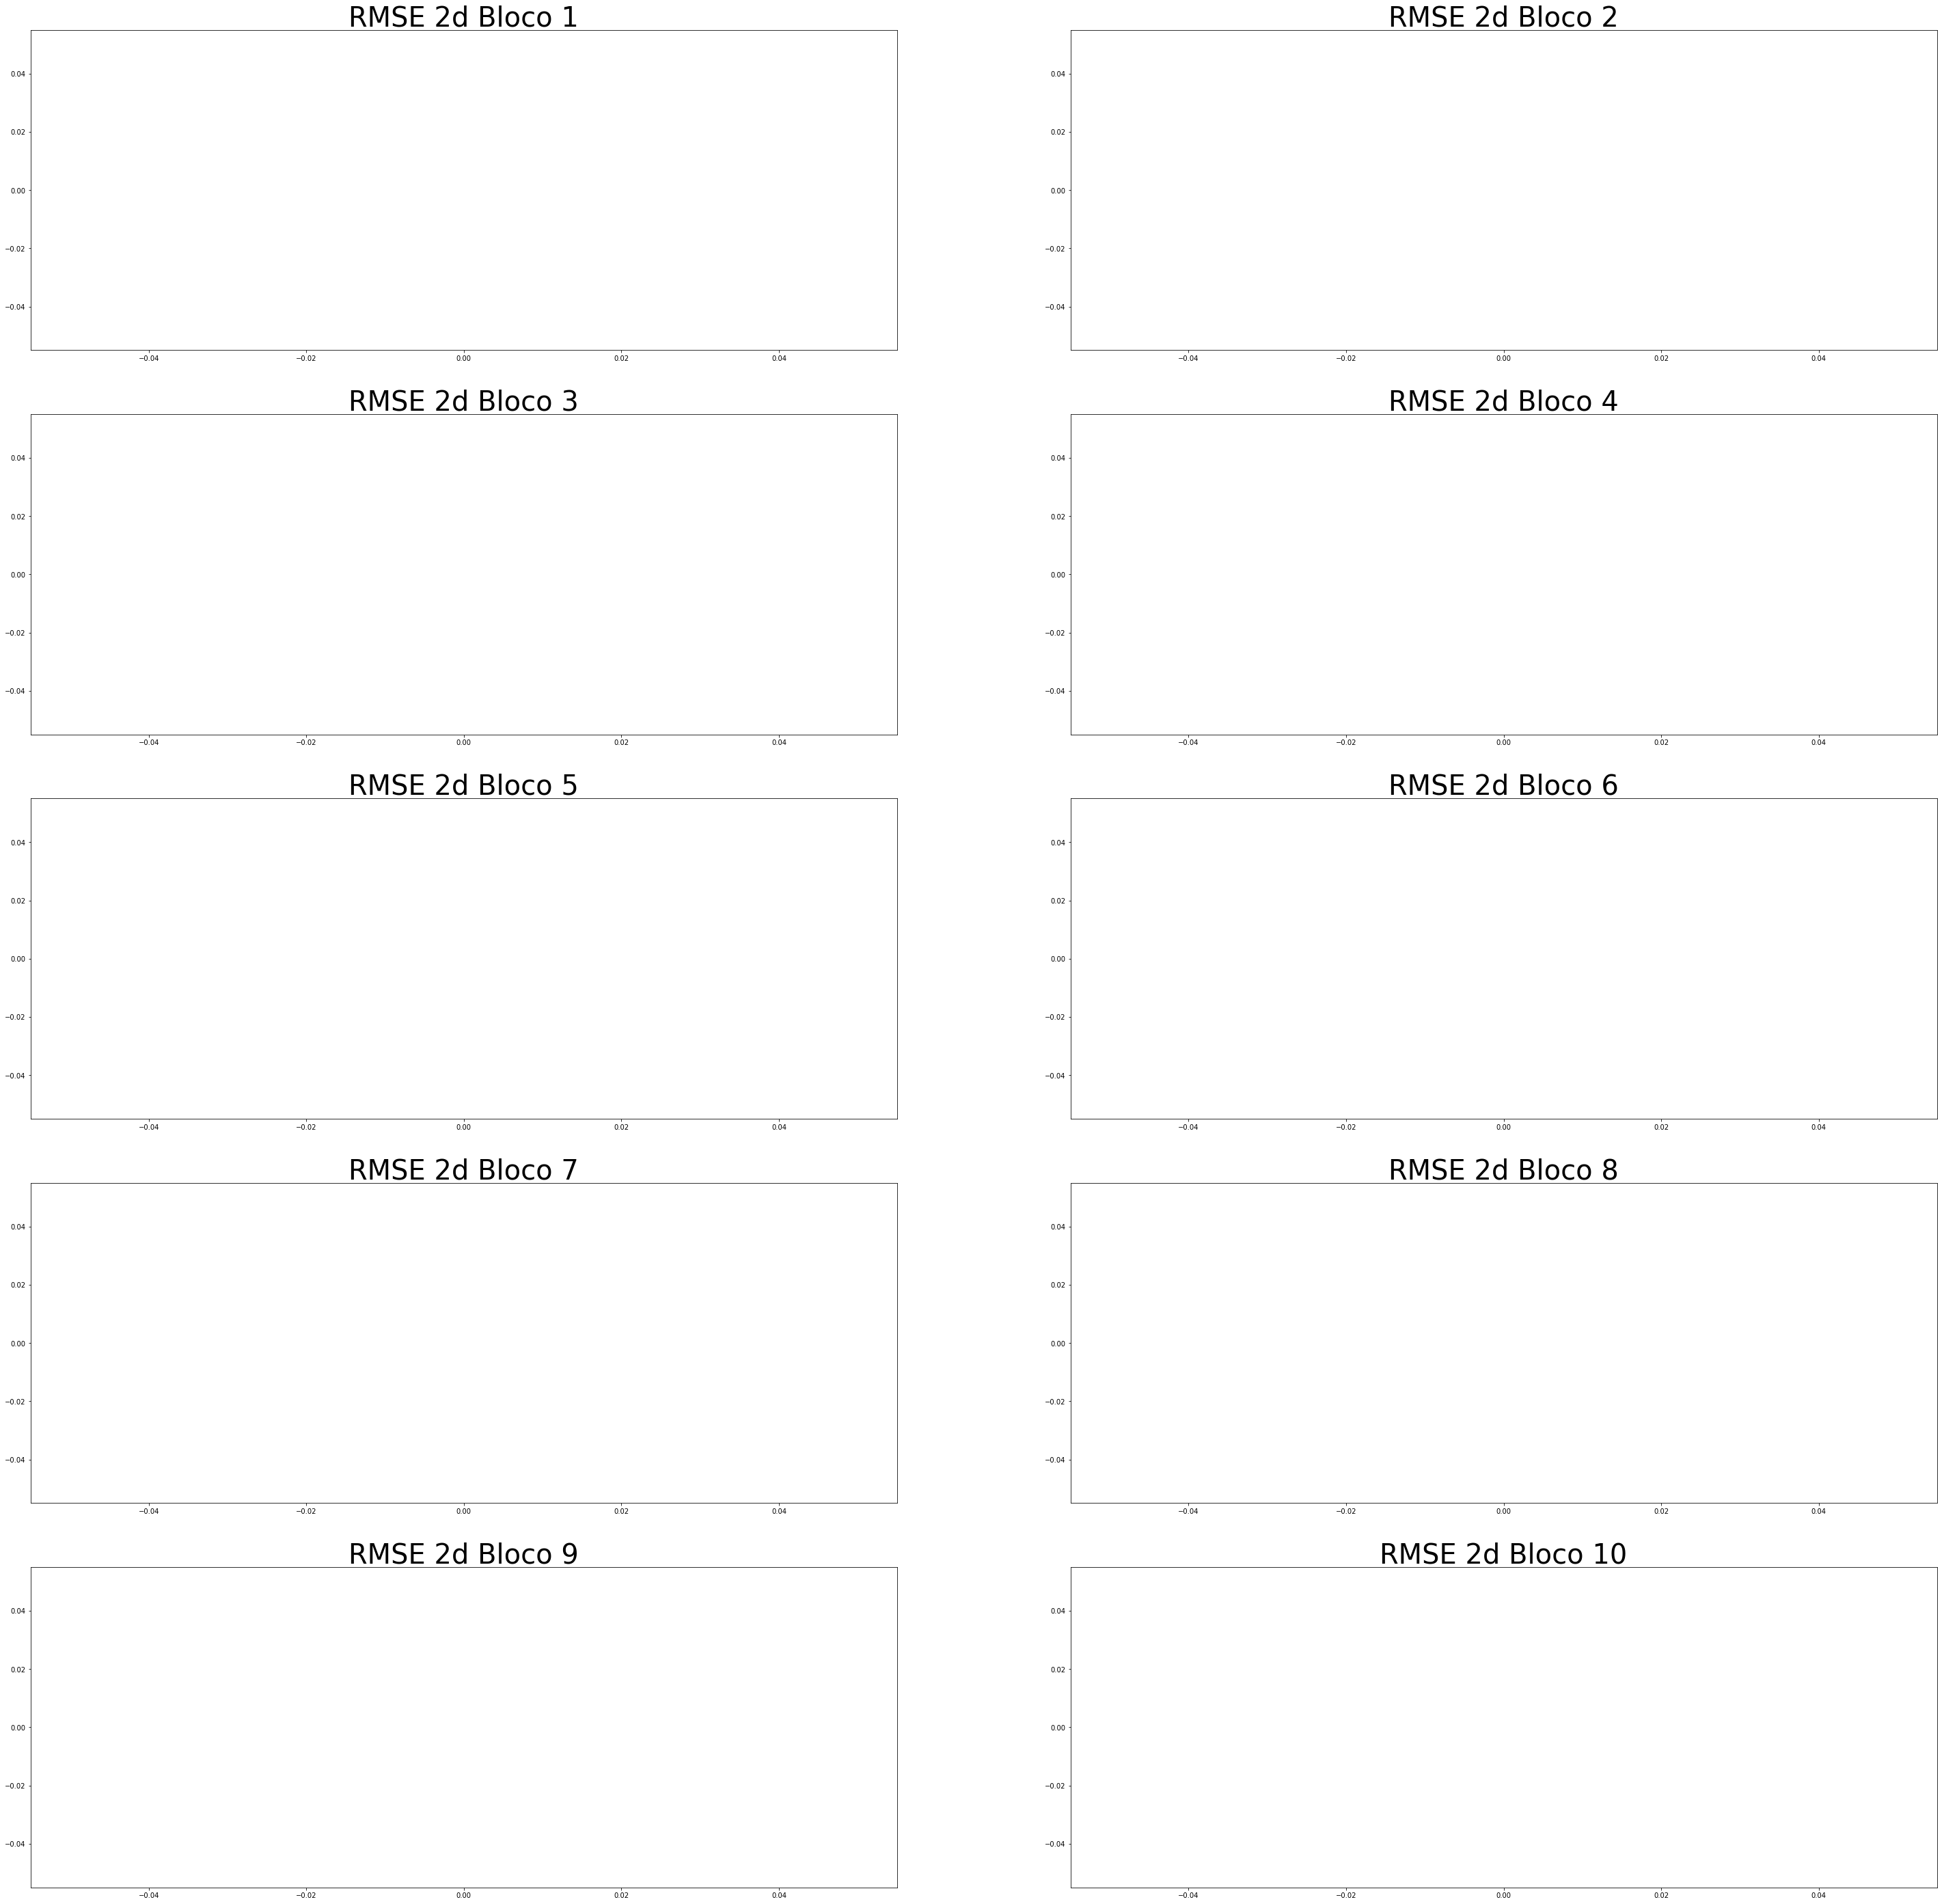

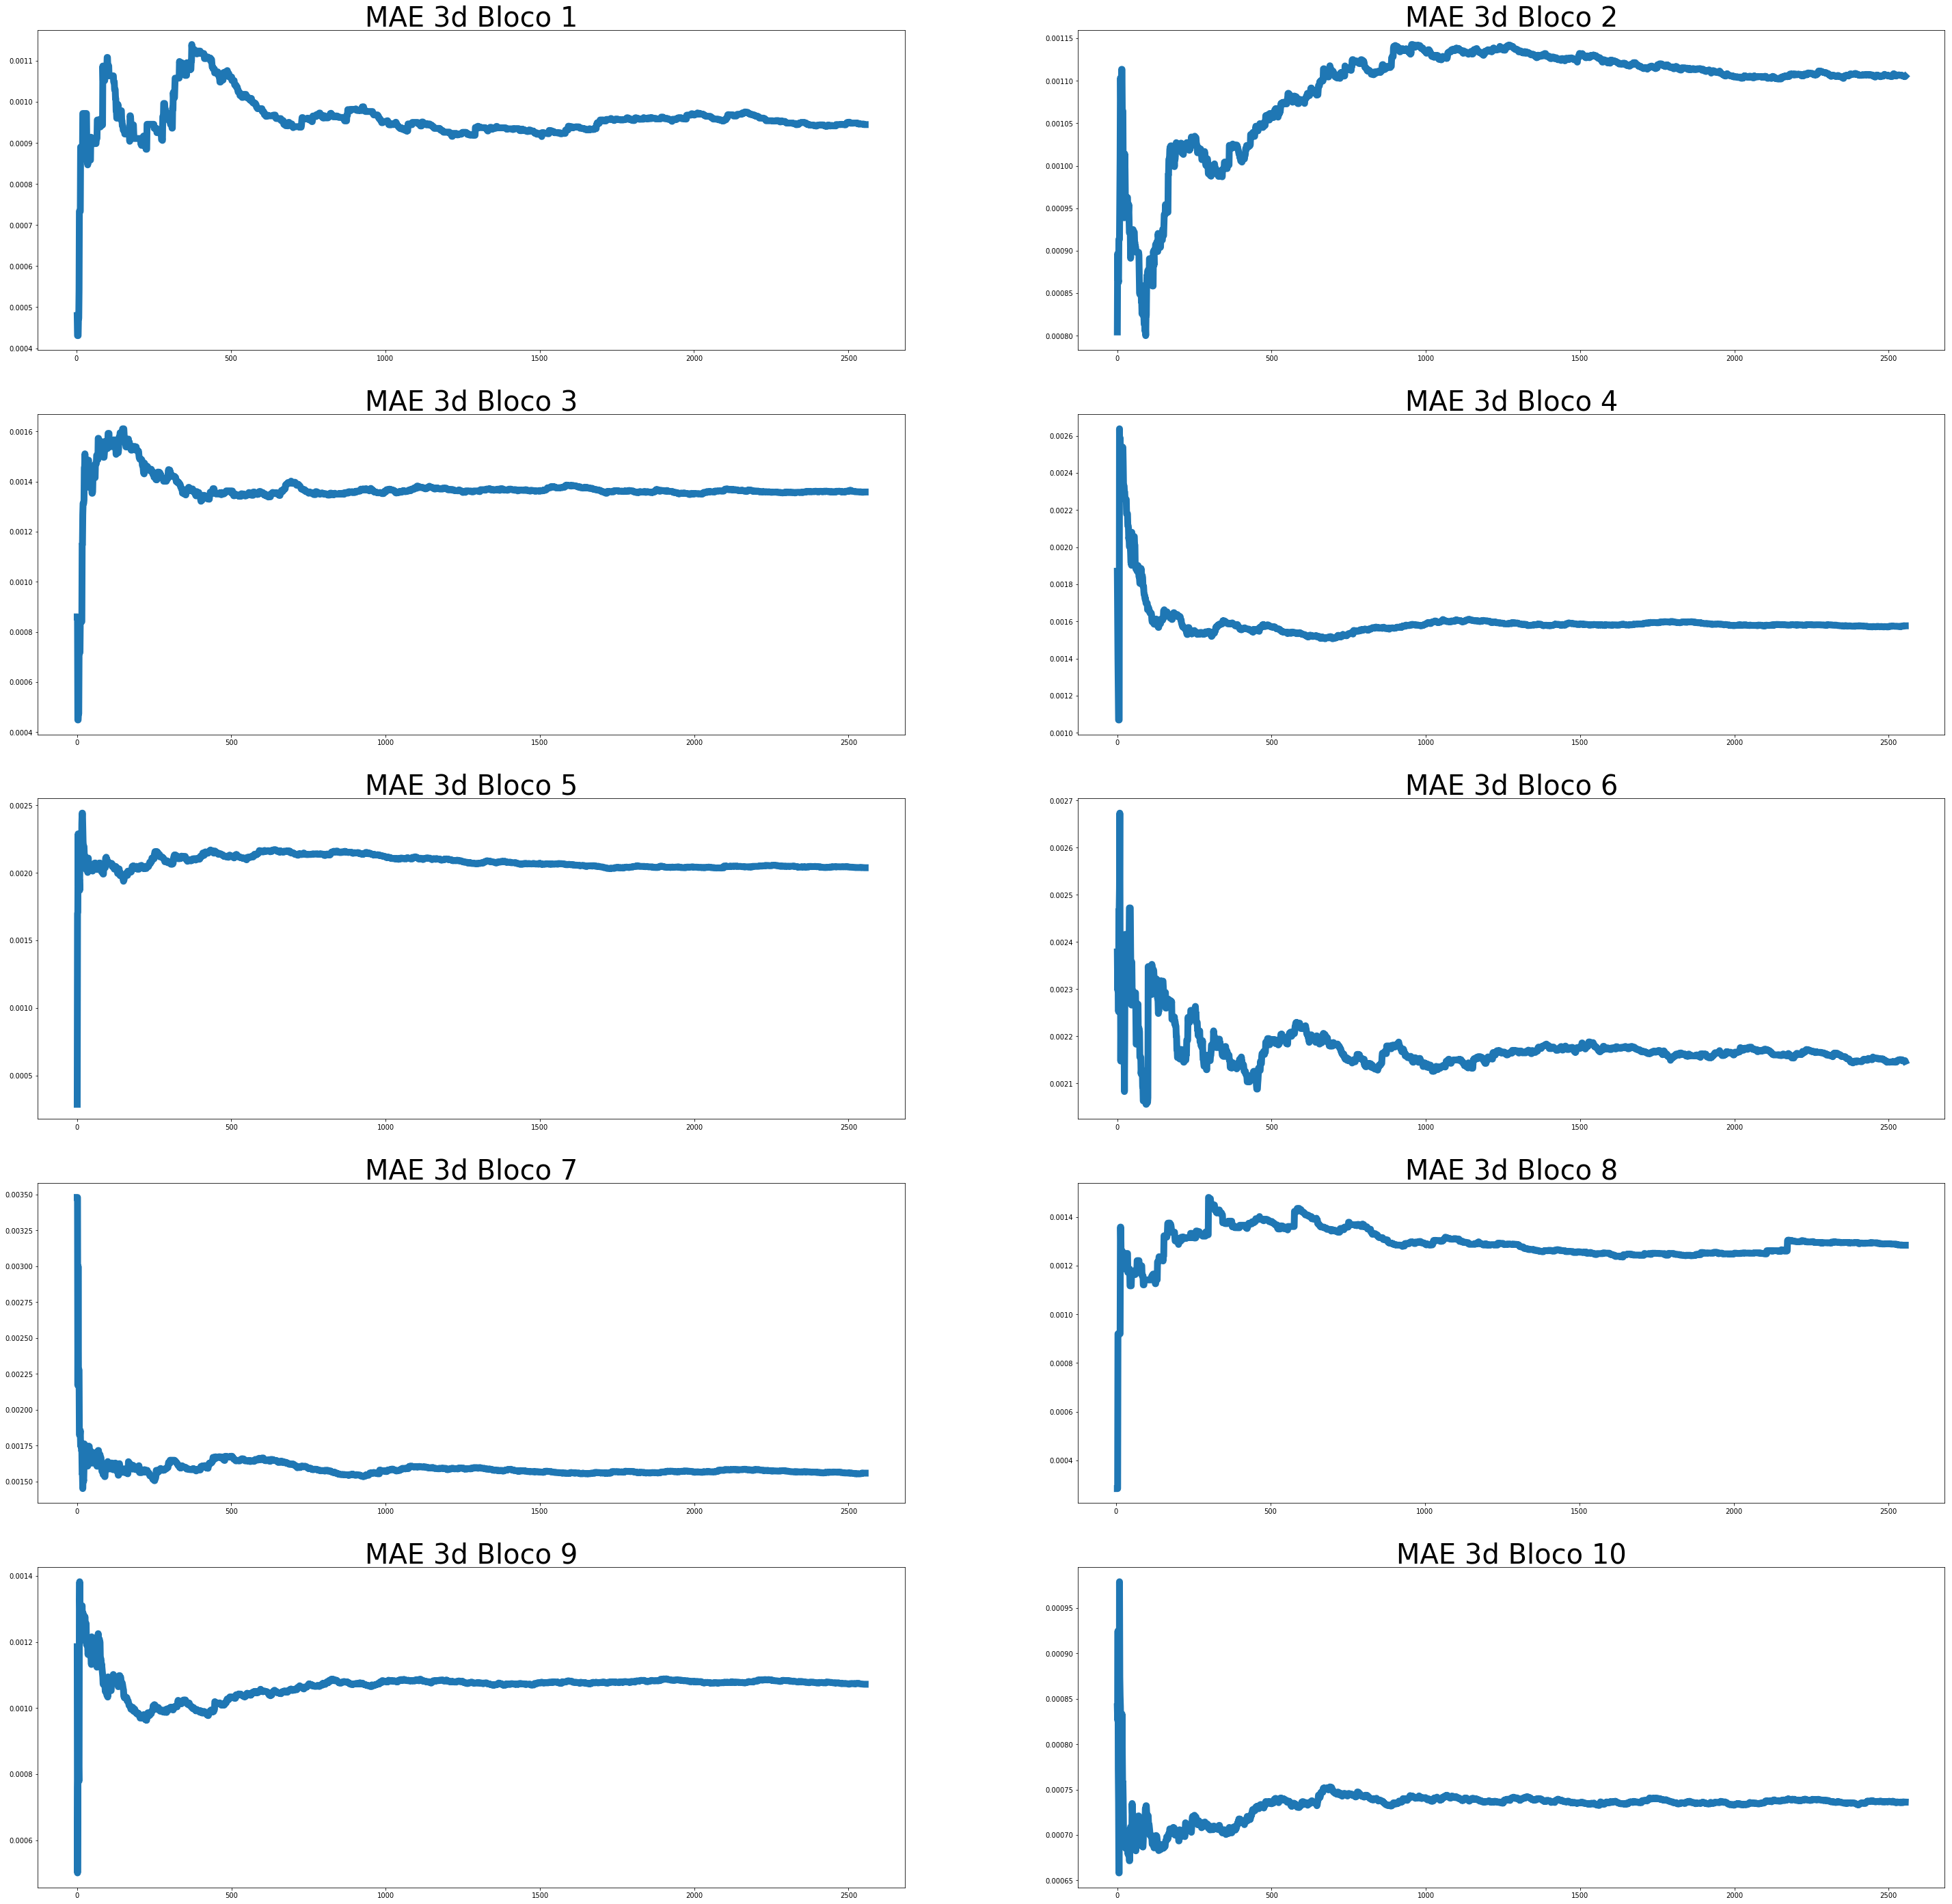

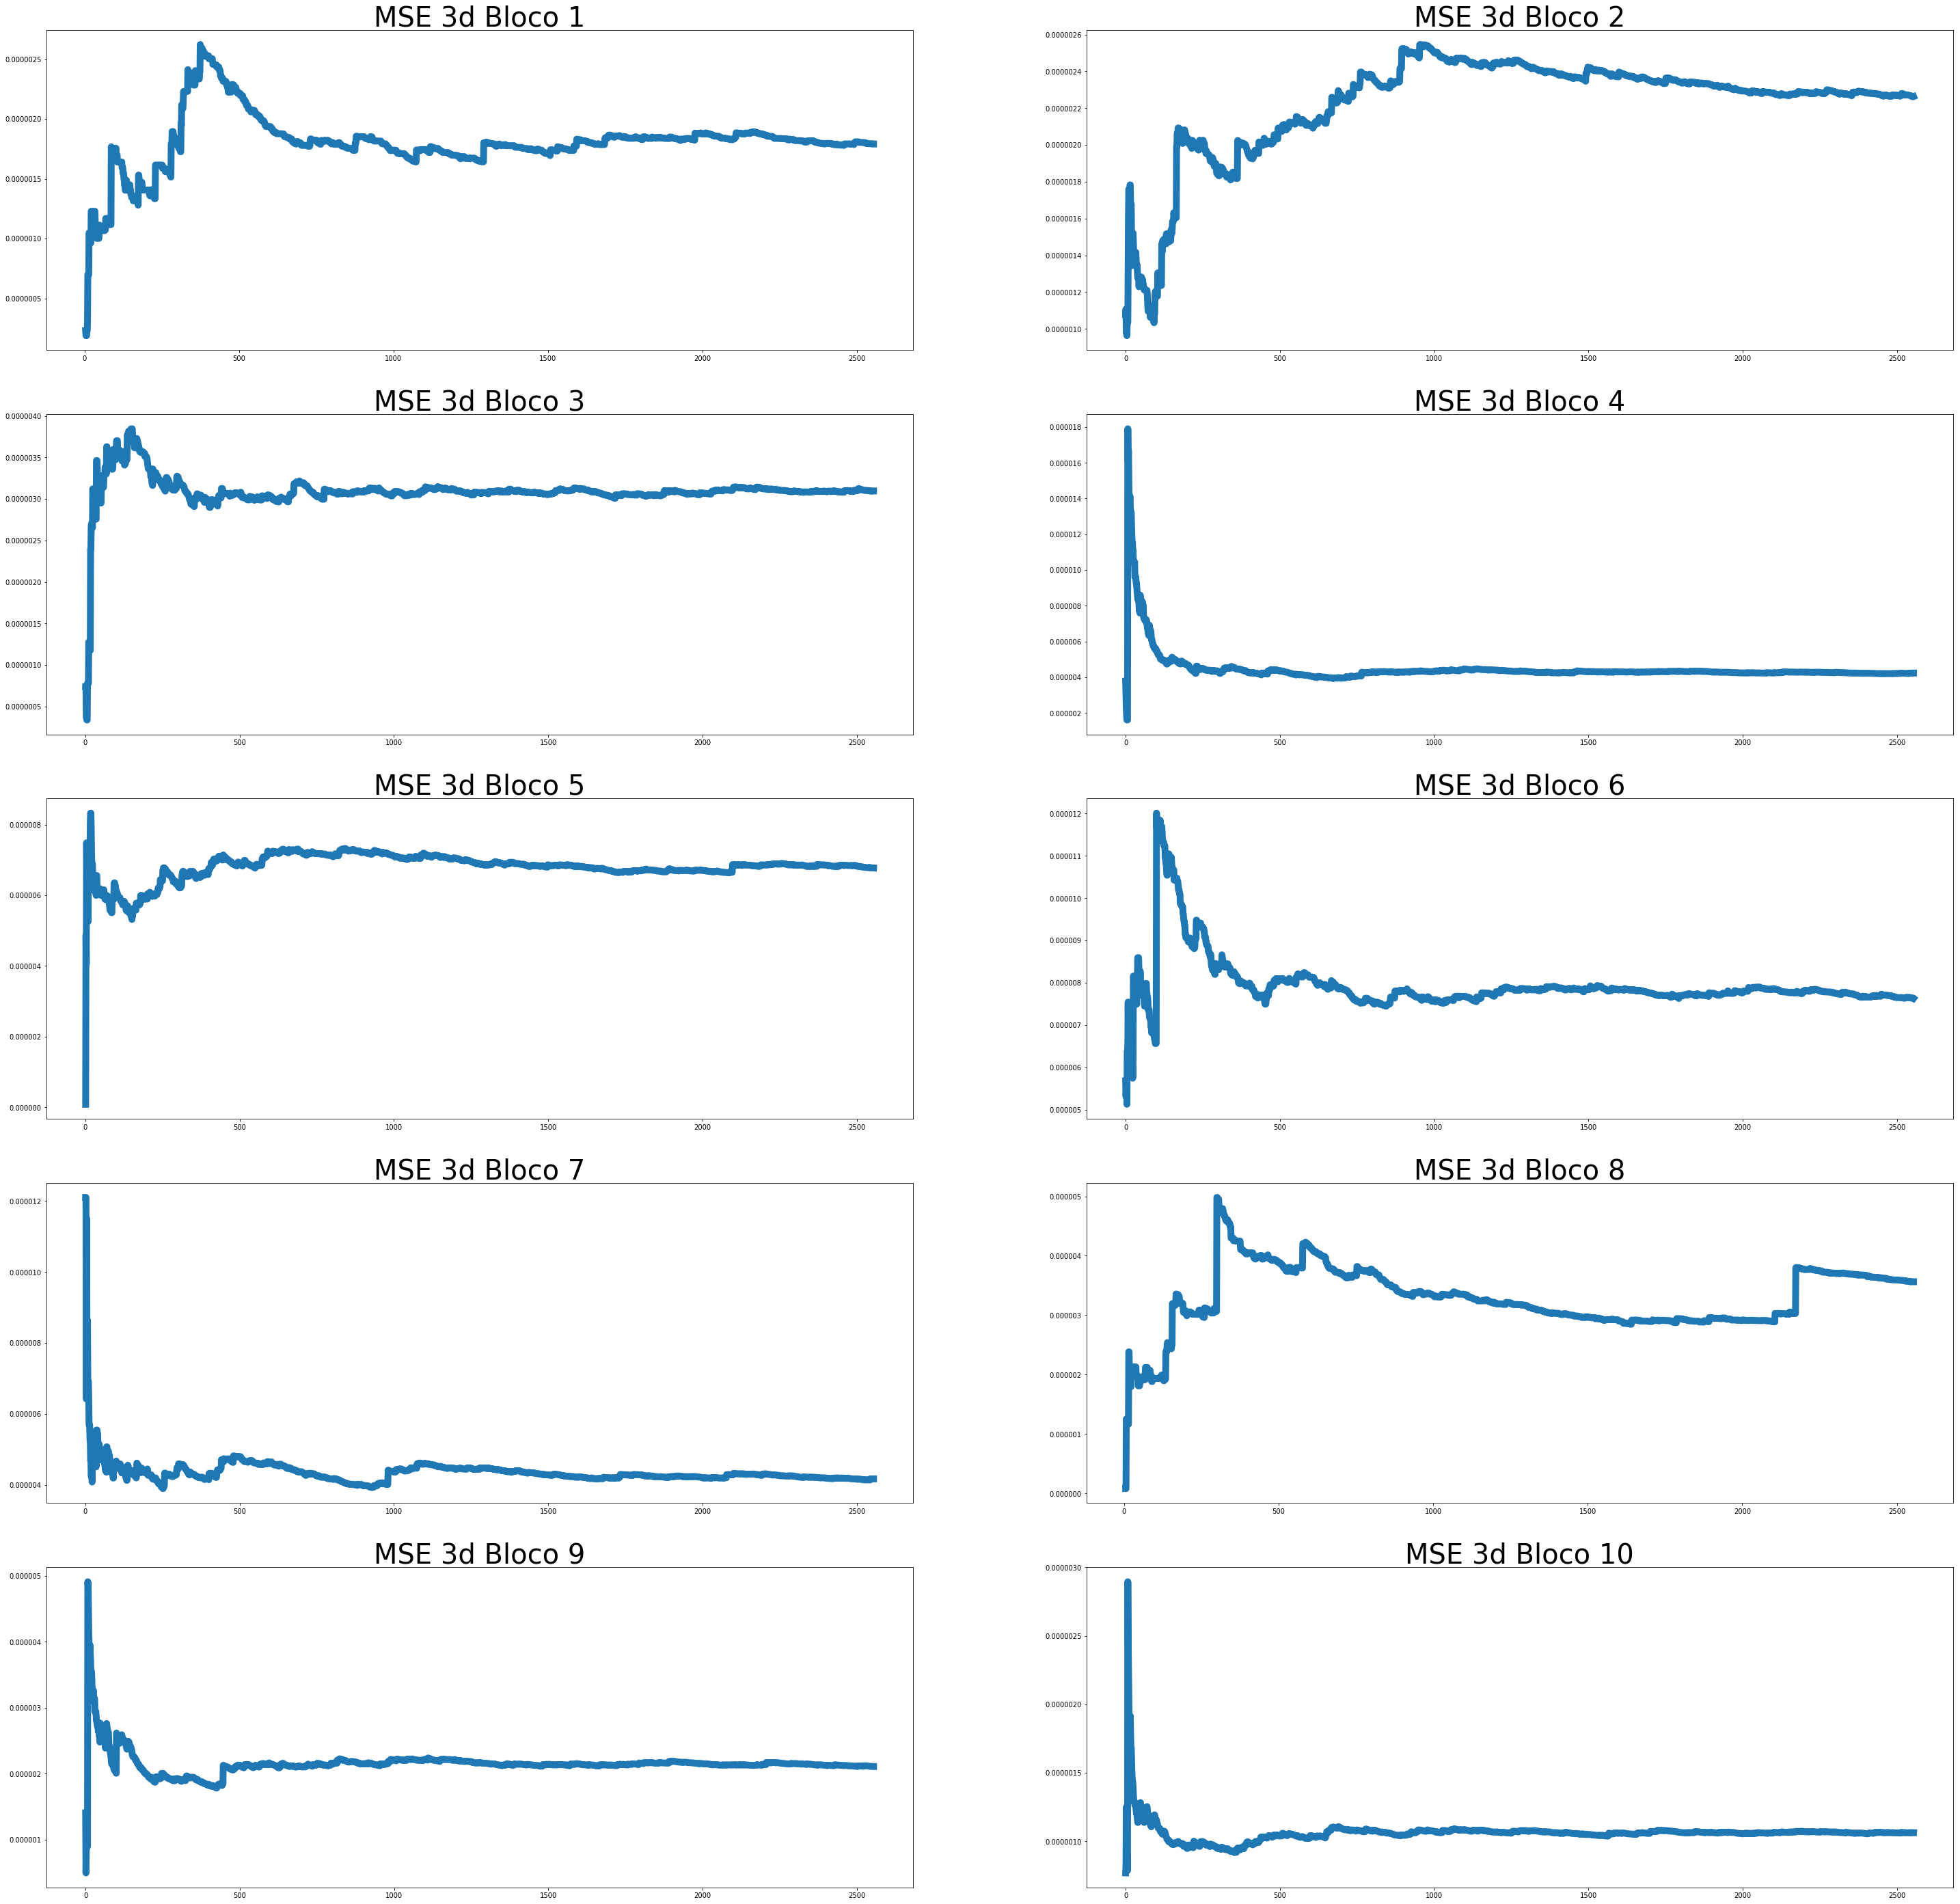

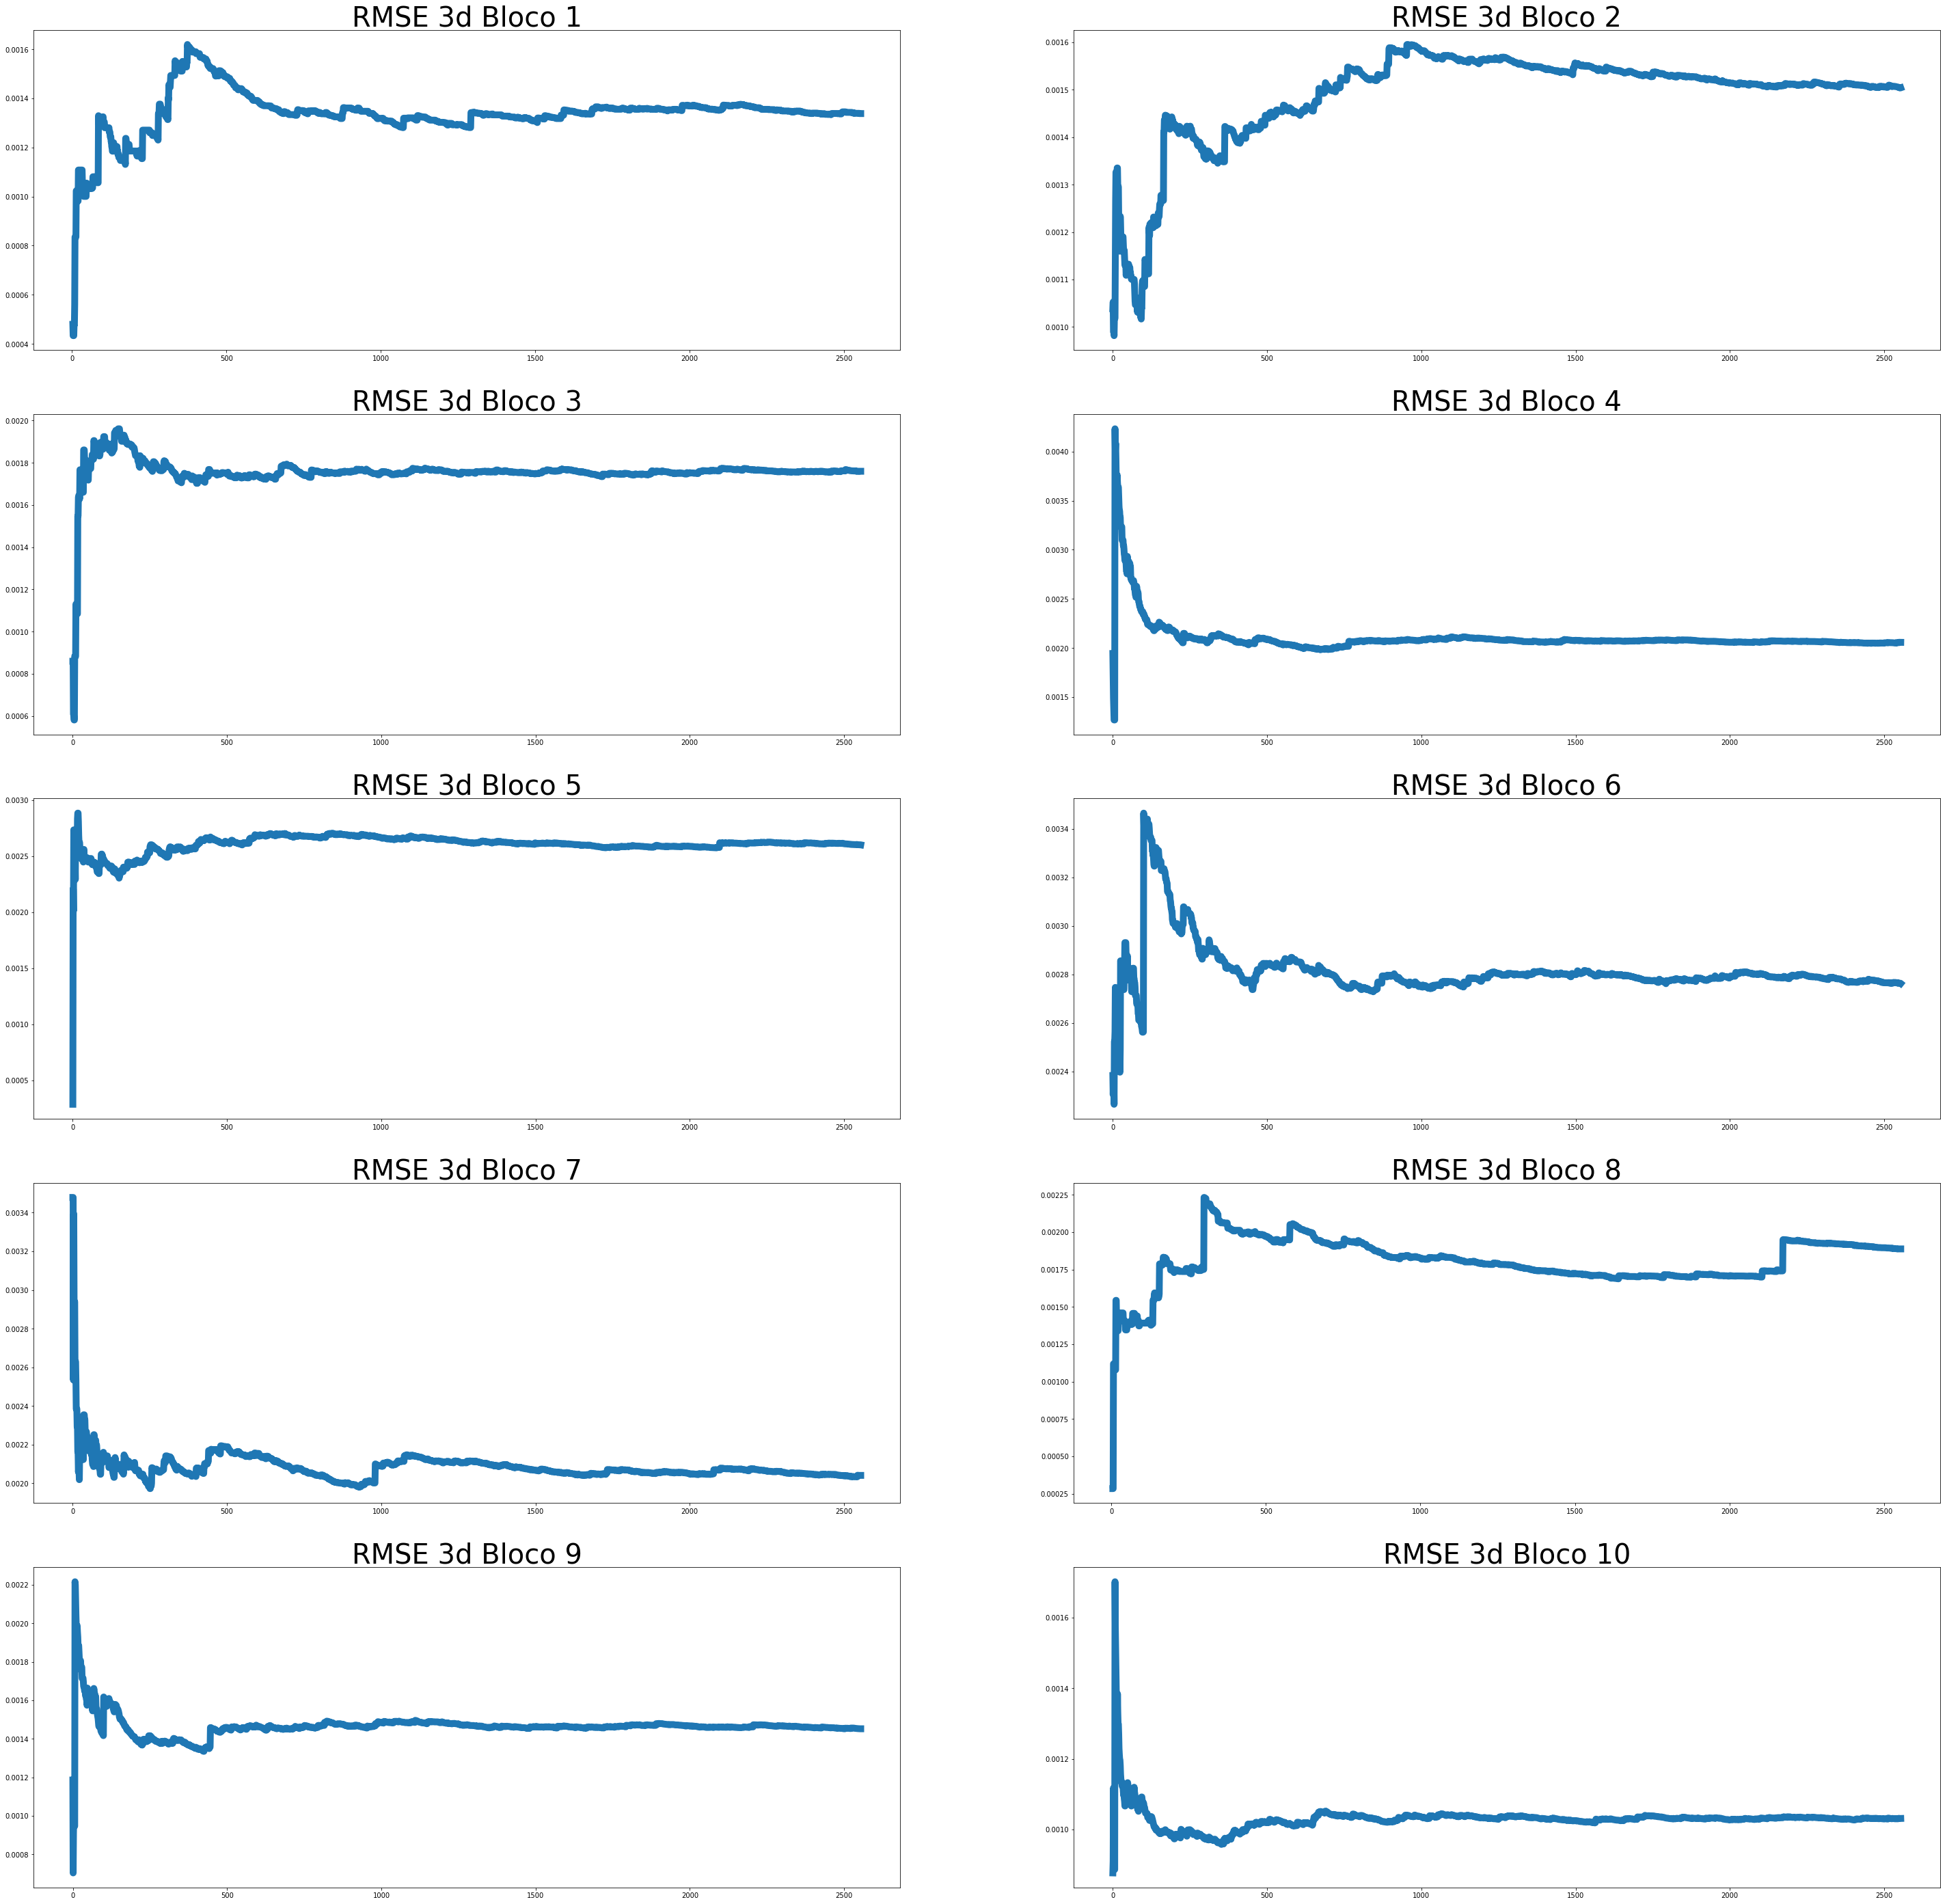

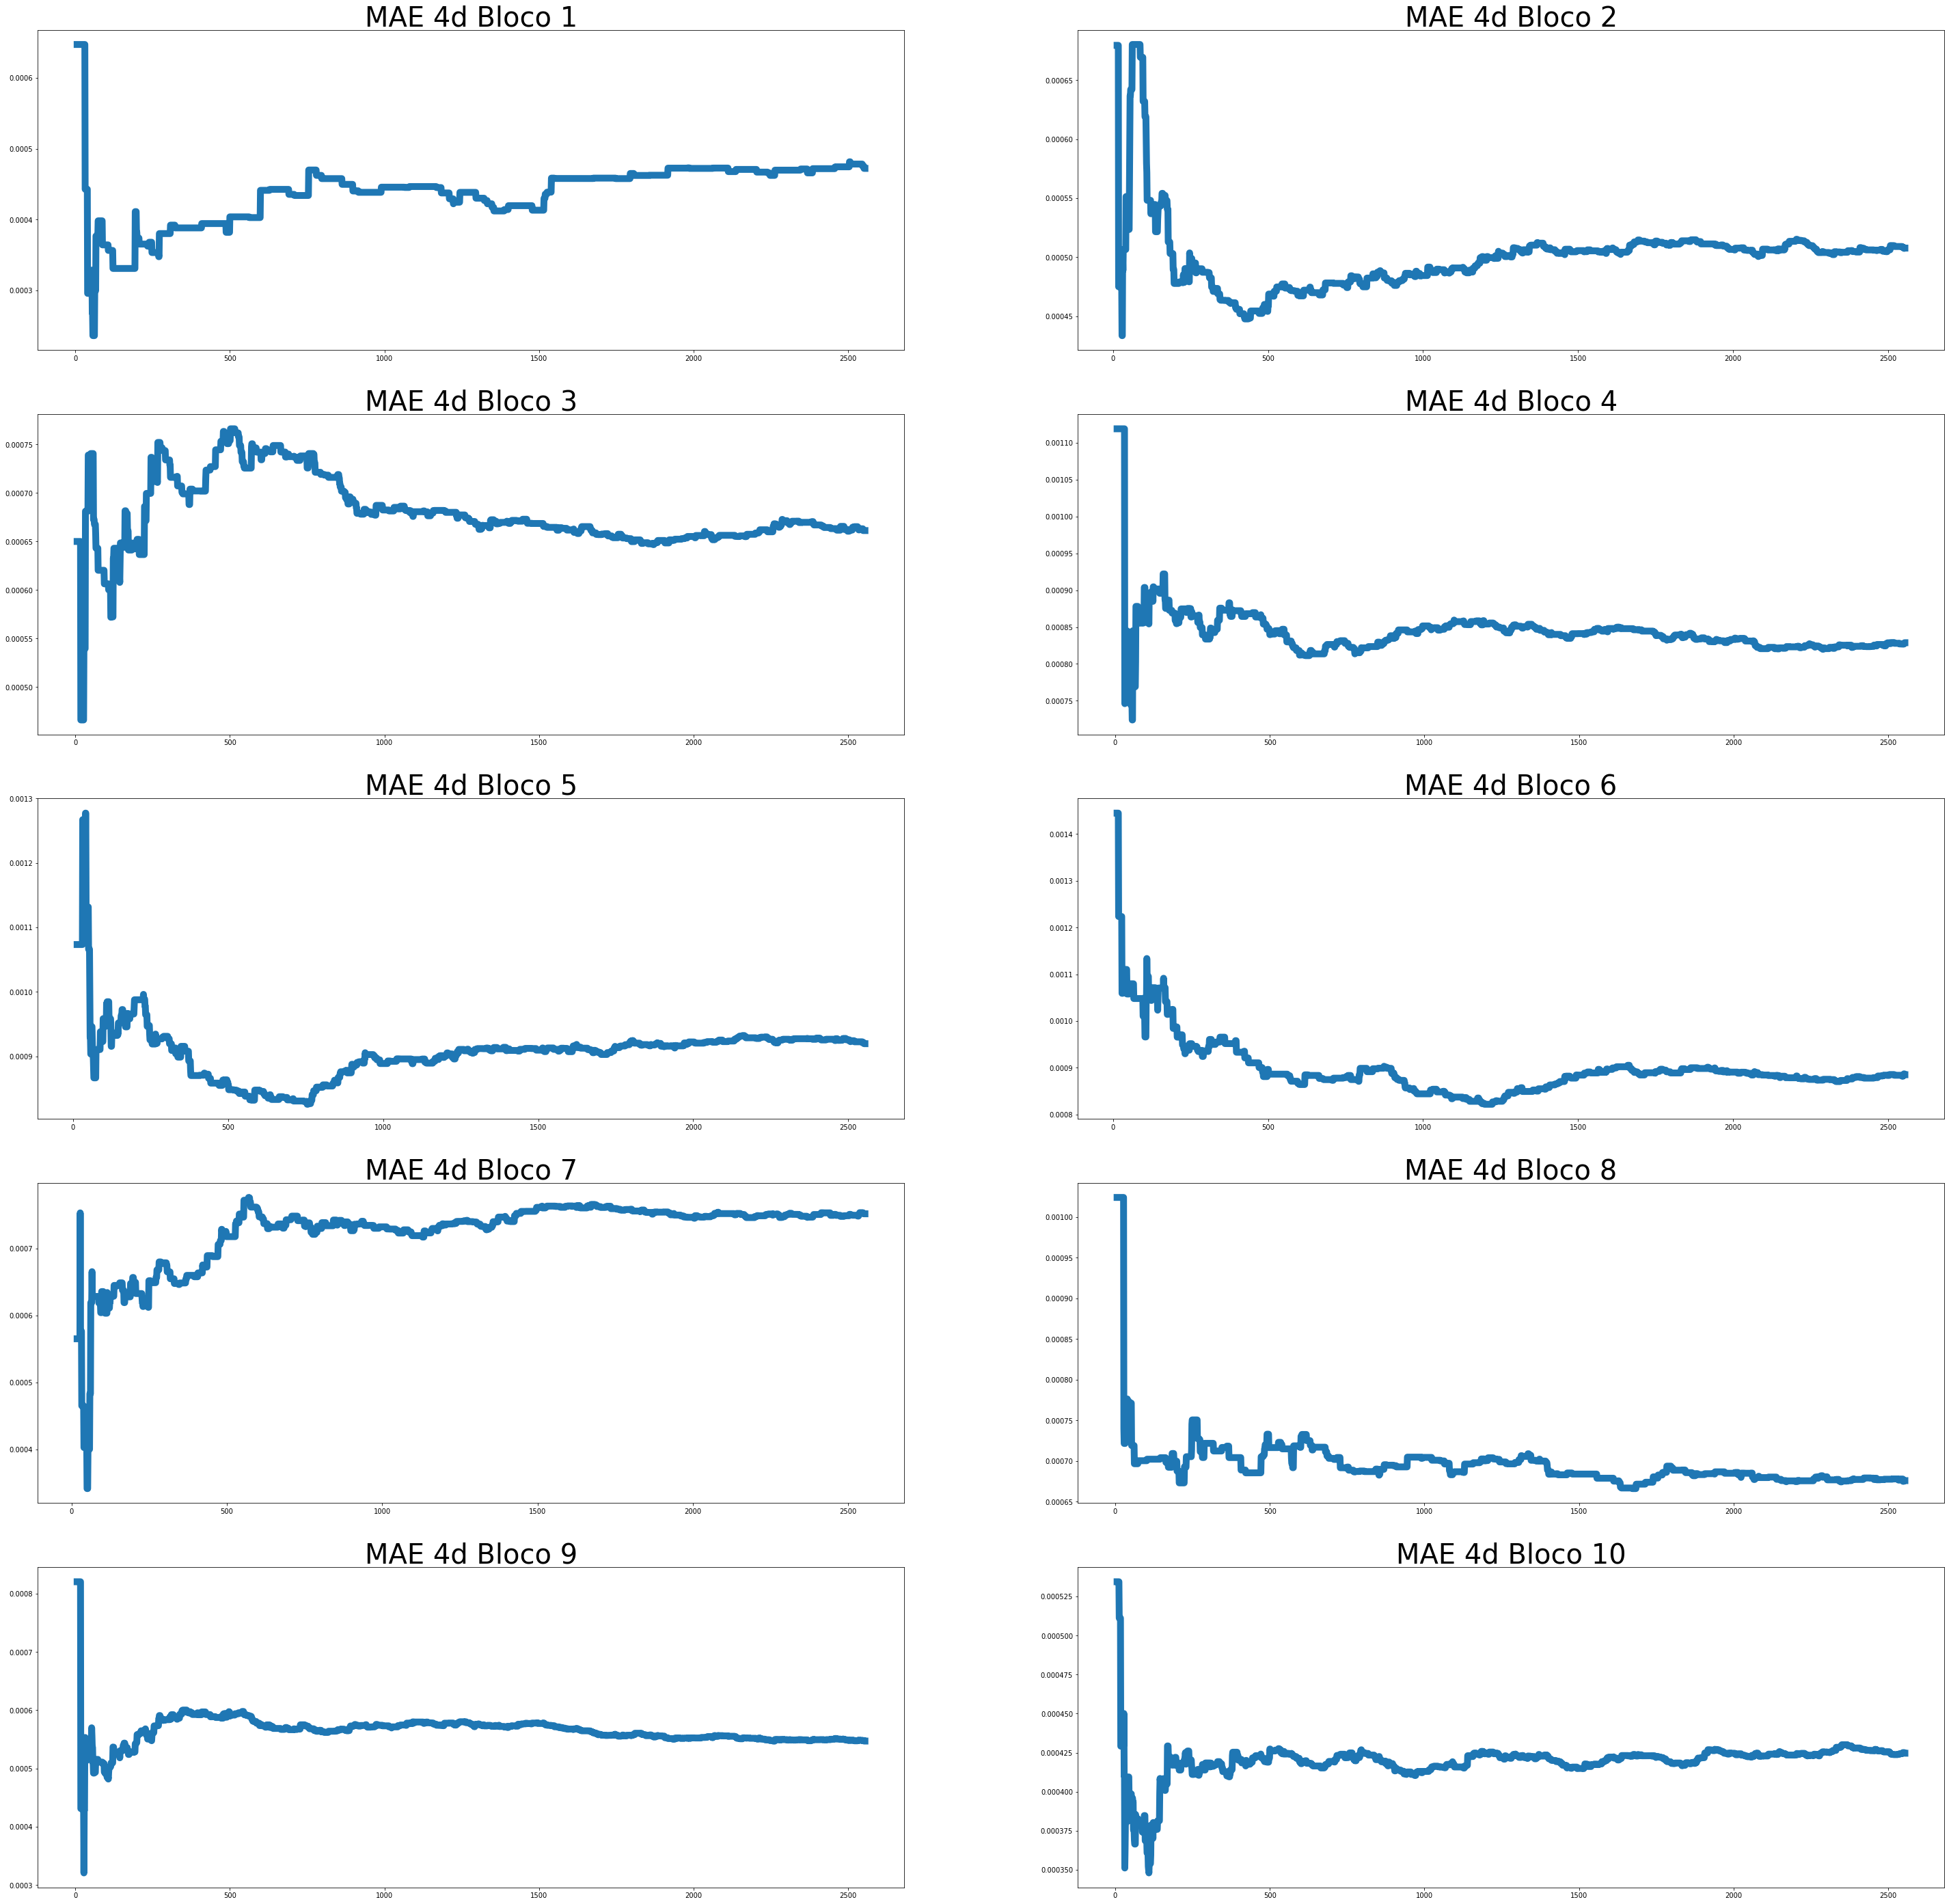

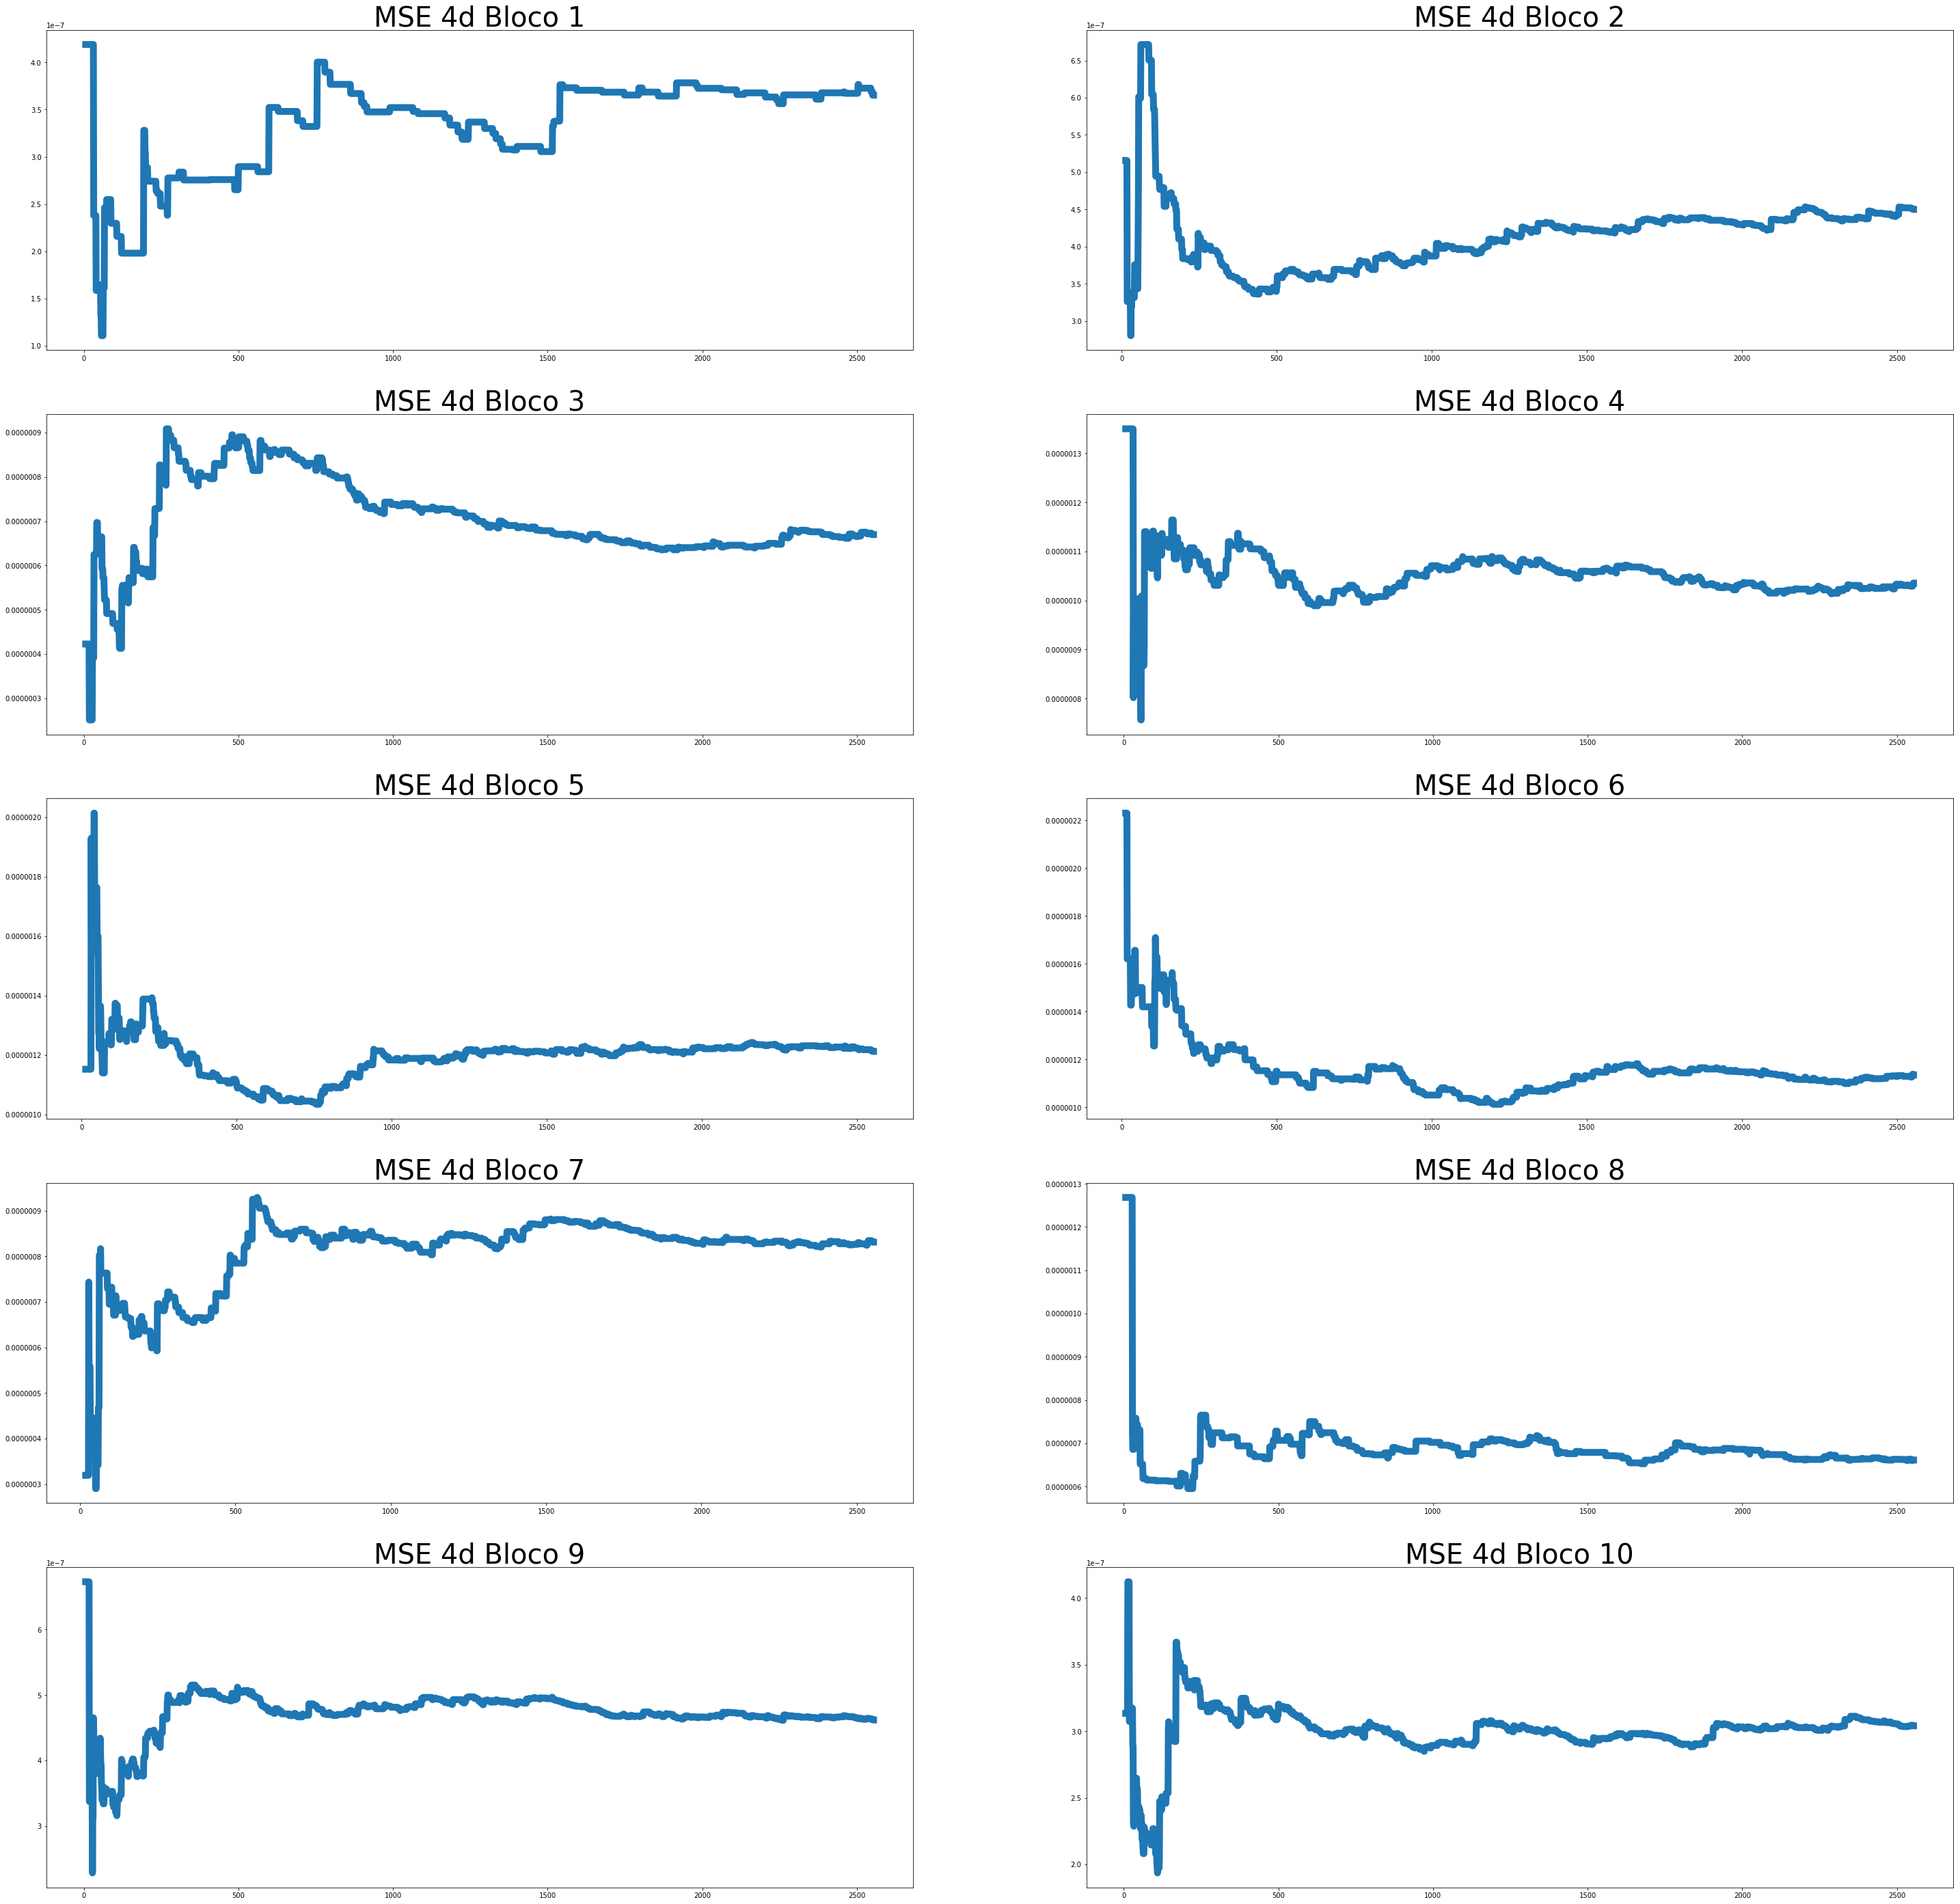

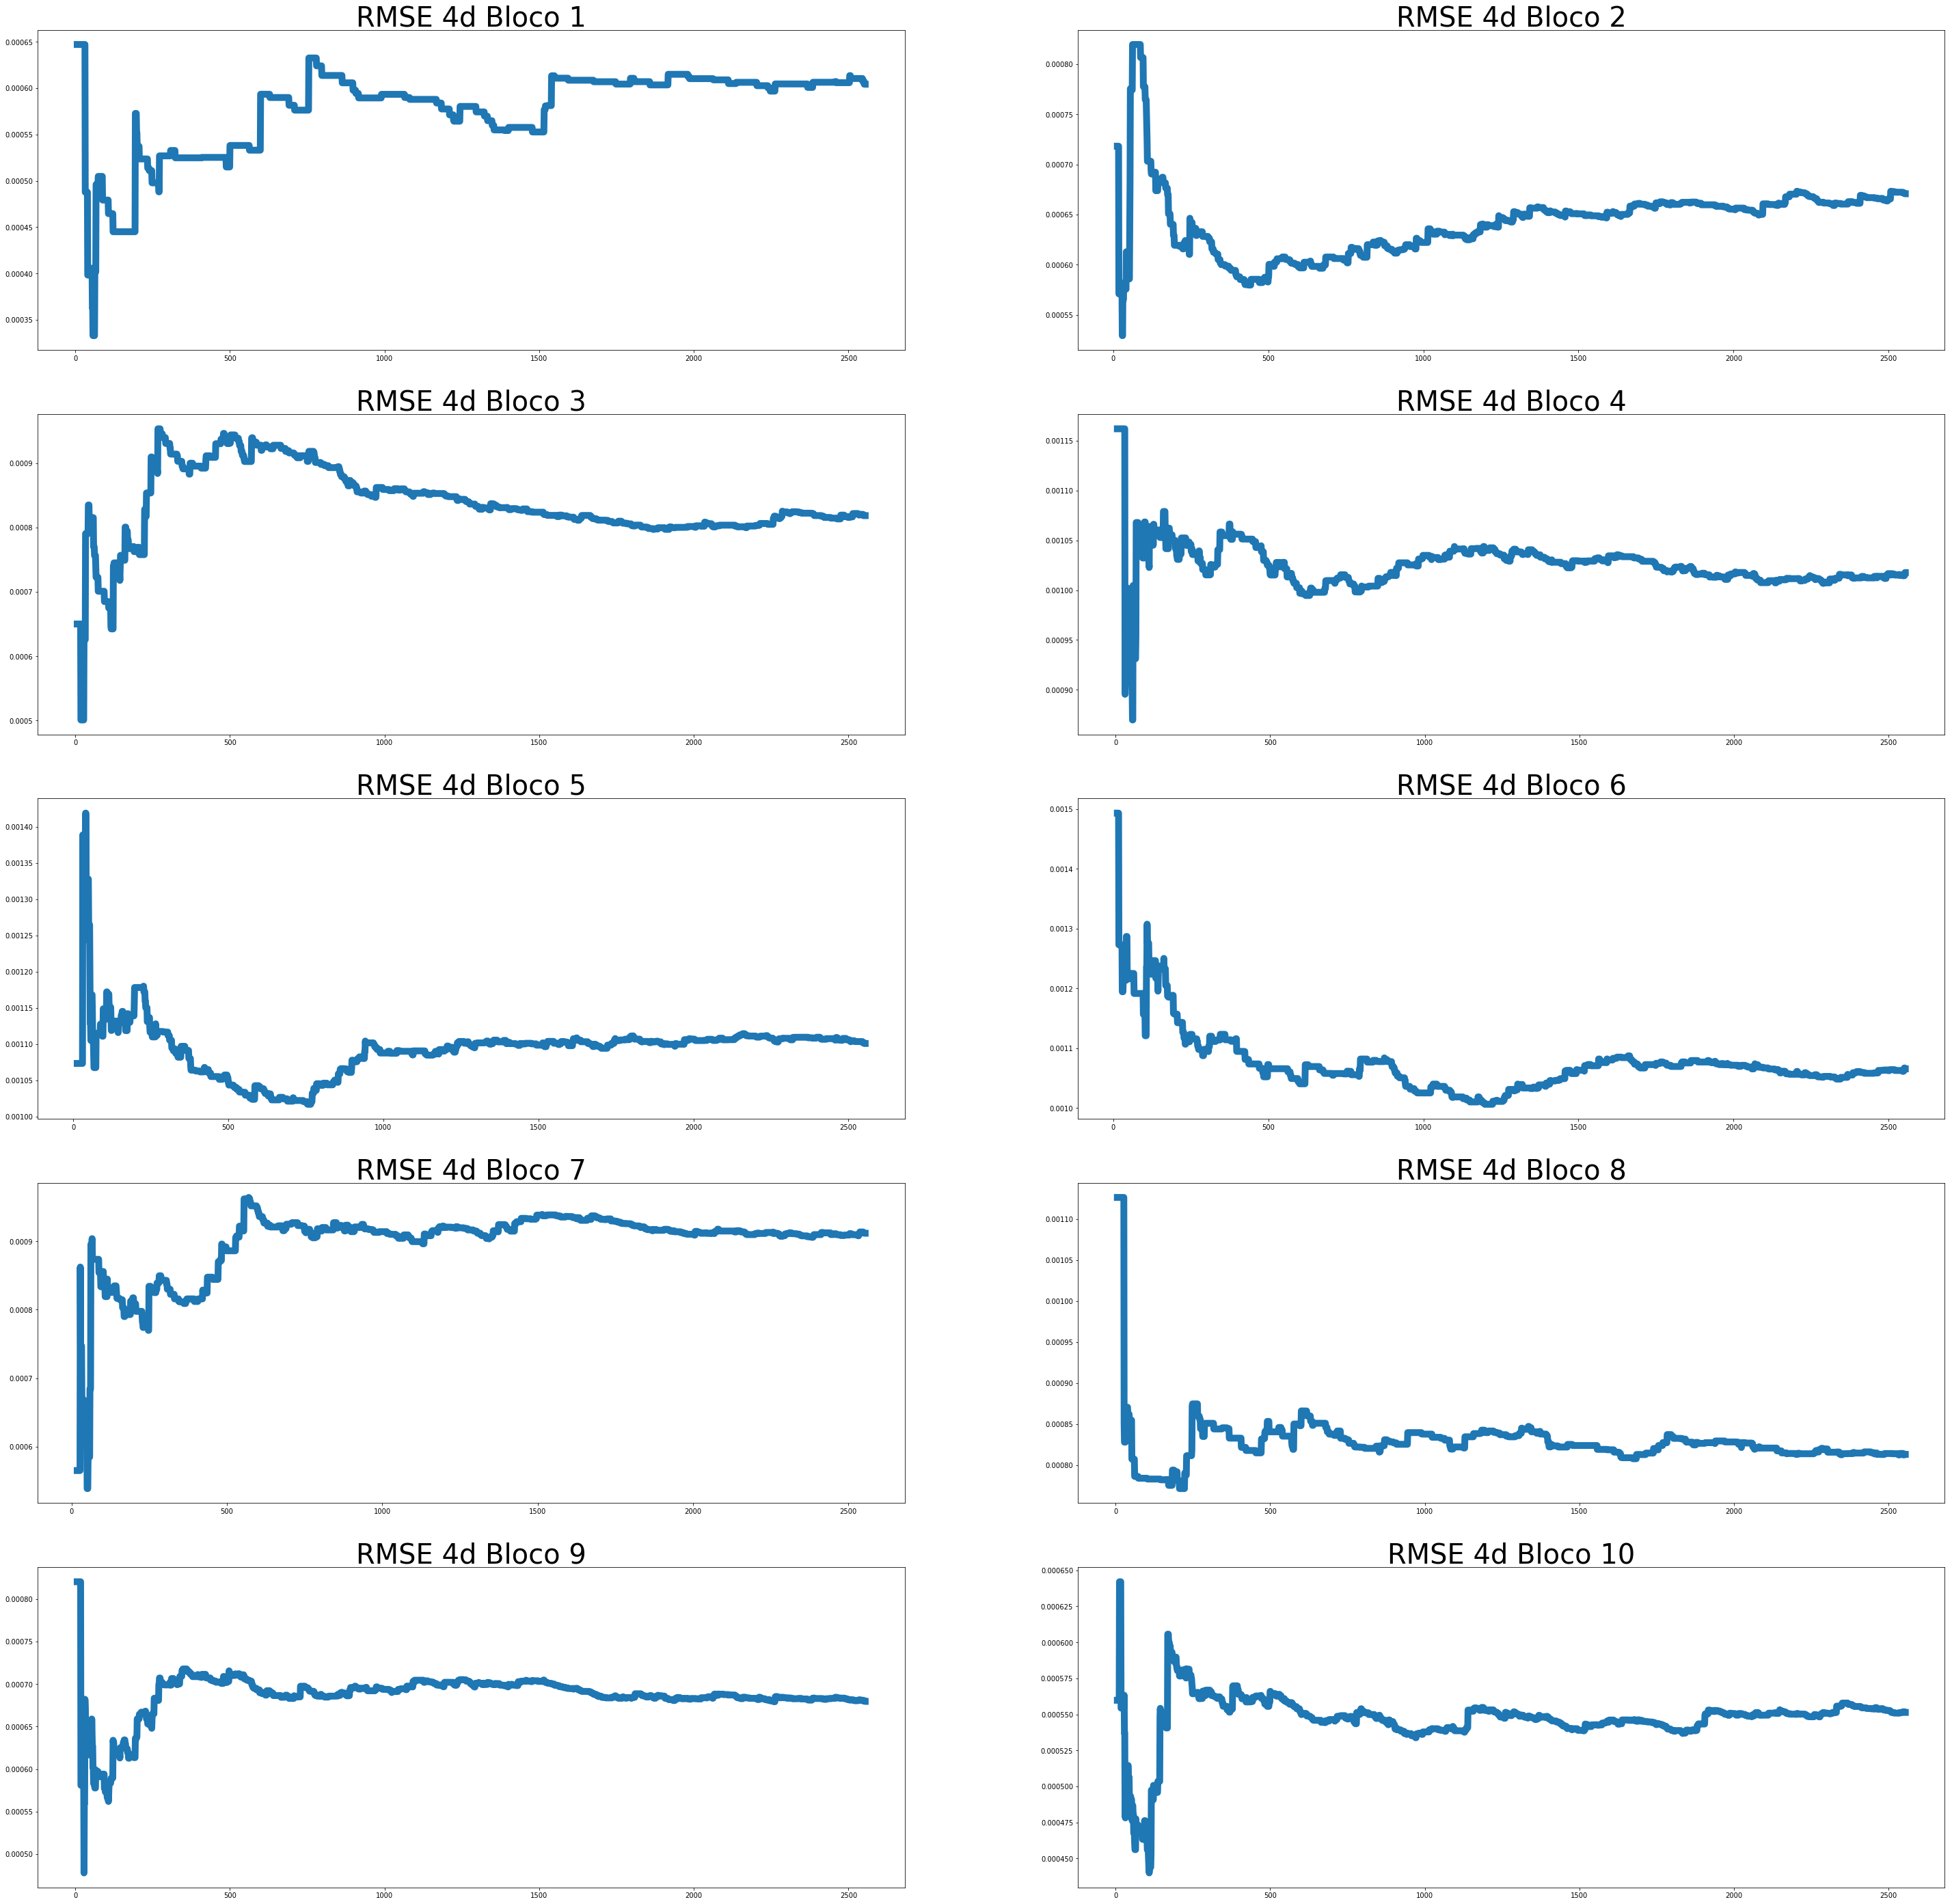

In [5]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



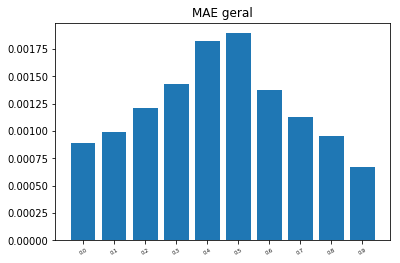

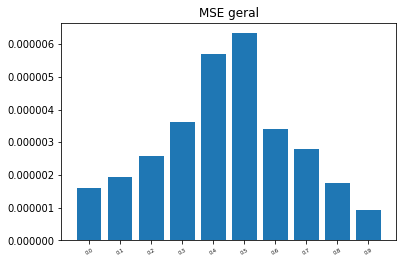

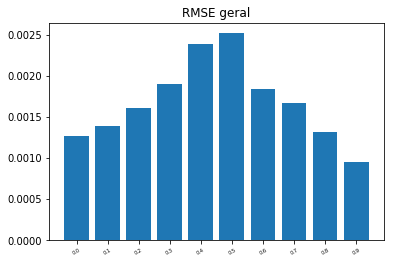


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



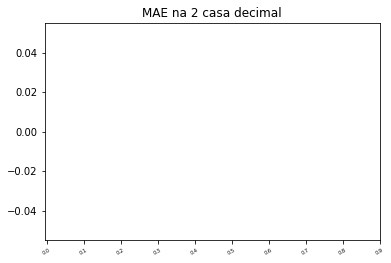

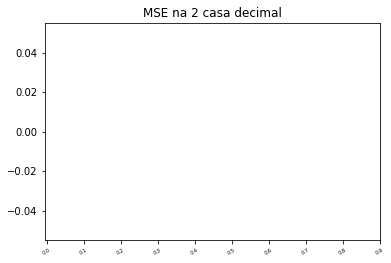

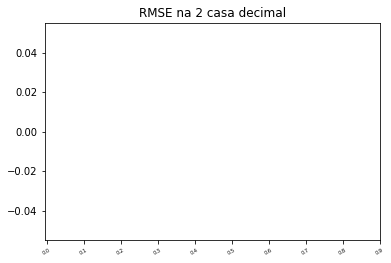


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



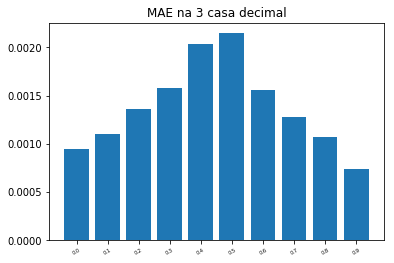

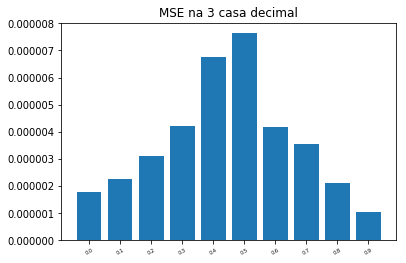

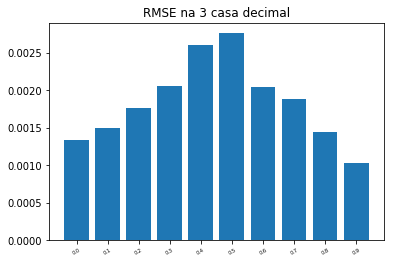


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



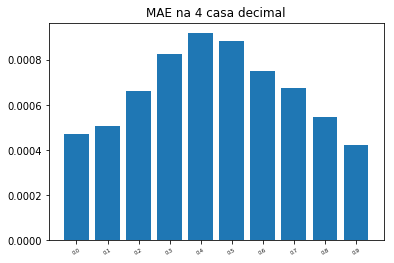

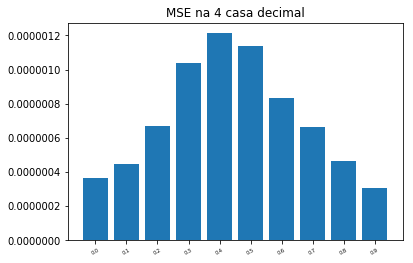

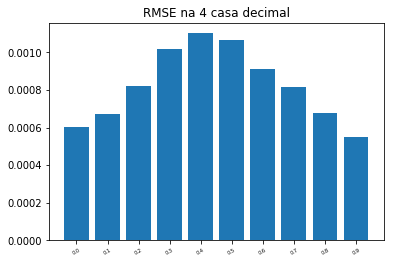

In [6]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()
